In [1]:
import metrics as me

import anndata as ad
import episcanpy as epi
import scanpy as sc

import numpy as np 
import pandas as pd
from pandas import DataFrame

from metrics_paired_data import accuracy_paired_omics, accuracy_paired_omics_per_cell_type
from metrics_paired_data import distance_between_matching_barcodes, average_distance_between_matching_barcodes
from metrics_paired_data import run_silhouette_metrics, run_silhouette_metrics_methods
from plot_metrics_paired_data import plot_accuracy_per_cell_type, metric_heatmap

# settings for the plots
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=250,
                     frameon=True, vector_friendly=True,
                     color_map="YlGnBu", format='pdf', transparent=False,
                     ipython_format='png2x')

# Load the test data

In [2]:
adataBrUnint = ad.read("./input_data_for_metrics/control_brain_processed.h5ad")
adataBrSeu = ad.read("./input_data_for_metrics/seurat_brain_processed.h5ad")
adataBrLig = ad.read("./input_data_for_metrics/liger_brain_processed.h5ad")

In [3]:
adataSkUnint = ad.read("./input_data_for_metrics/control_skin_processed.h5ad")
adataSkSeu = ad.read("./input_data_for_metrics/seurat_skin_processed.h5ad")
adataSkLig = ad.read("./input_data_for_metrics/liger_skin_processed.h5ad")

## Create a dataframe to store the metrics

In [4]:
df_metrics_brain = pd.DataFrame(index=['Unintegrated_brain', 'Seurat brain', 'Liger_brain'])
df_metrics_skin = pd.DataFrame(index=['Unintegrated_skin', 'Seurat_skin', 'Liger_skin'])

# Running metrics

## ARI 

In [5]:
# brain
# paper_cell_type
ariBU = epi.tl.ARI(adataBrUnint,'paper.cell.type', 'louvain_19')
ariBS = epi.tl.ARI(adataBrSeu,'paper.cell.type', 'louvain_19')
ariBL = epi.tl.ARI(adataBrLig,'paper.cell.type', 'louvain_19')
df_metrics_brain['ARI_paper_cell_type'] = [ariBU, ariBS, ariBL]

# broad_cell_type_annotation
ariBU = epi.tl.ARI(adataBrUnint,'broad_cell_type_annotation', 'louvain_7')
ariBS = epi.tl.ARI(adataBrSeu,'broad_cell_type_annotation', 'louvain_7')
ariBL = epi.tl.ARI(adataBrLig,'broad_cell_type_annotation', 'louvain_7')
df_metrics_brain['ARI_broad_cell_type'] = [ariBU, ariBS, ariBL]
del ariBU, ariBS, ariBL

In [6]:
# skin
# paper_cell_type
ariSU = epi.tl.ARI(adataSkUnint,'paper.cell.type', 'louvain_23')
ariSS = epi.tl.ARI(adataSkSeu,'paper.cell.type', 'louvain_23')
ariSL = epi.tl.ARI(adataSkLig,'paper.cell.type', 'louvain_23')
df_metrics_skin['ARI_paper_cell_type'] = [ariSU, ariSS, ariSL]
del ariSU, ariSS, ariSL

## AMI

In [7]:
# brain
# paper_cell_type
amiBU = epi.tl.AMI(adataBrUnint,'paper.cell.type', 'louvain_19')
amiBS = epi.tl.AMI(adataBrSeu,'paper.cell.type', 'louvain_19')
amiBL = epi.tl.AMI(adataBrLig,'paper.cell.type', 'louvain_19')
df_metrics_brain['AMI_paper_cell_type'] = [amiBU, amiBS, amiBL]

# broad_cell_type_annotation
amiBU = epi.tl.AMI(adataBrUnint,'broad_cell_type_annotation', 'louvain_7')
amiBS = epi.tl.AMI(adataBrSeu,'broad_cell_type_annotation', 'louvain_7')
amiBL = epi.tl.AMI(adataBrLig,'broad_cell_type_annotation', 'louvain_7')
df_metrics_brain['AMI_broad_cell_type'] = [amiBU, amiBS, amiBL]
del amiBU, amiBS, amiBL

In [8]:
# skin
# paper_cell_type
amiSU = epi.tl.AMI(adataSkUnint,'paper.cell.type', 'louvain_23')
amiSS = epi.tl.AMI(adataSkSeu,'paper.cell.type', 'louvain_23')
amiSL = epi.tl.AMI(adataSkLig,'paper.cell.type', 'louvain_23')
df_metrics_skin['AMI_paper_cell_type'] = [amiSU, amiSS, amiSL]
del amiSU, amiSS, amiSL

## Homogeneity

In [9]:
# brain
# paper_cell_type
homBU = epi.tl.homogeneity(adataBrUnint,'paper.cell.type', 'louvain_19')
homBS = epi.tl.homogeneity(adataBrSeu,'paper.cell.type', 'louvain_19')
homBL = epi.tl.homogeneity(adataBrLig,'paper.cell.type', 'louvain_19')
df_metrics_brain['homogeneity_paper_cell_type'] = [homBU, homBS, homBL]

# broad_cell_type_annotation
homBU = epi.tl.homogeneity(adataBrUnint,'broad_cell_type_annotation', 'louvain_7')
homBS = epi.tl.homogeneity(adataBrSeu,'broad_cell_type_annotation', 'louvain_7')
homBL = epi.tl.homogeneity(adataBrLig,'broad_cell_type_annotation', 'louvain_7')
df_metrics_brain['homogeneity_broad_cell_type'] = [homBU, homBS, homBL]
del homBU, homBS, homBL

In [10]:
# skin
# paper_cell_type
homSU = epi.tl.homogeneity(adataSkUnint,'paper.cell.type', 'louvain_23')
homSS = epi.tl.homogeneity(adataSkSeu,'paper.cell.type', 'louvain_23')
homSL = epi.tl.homogeneity(adataSkLig,'paper.cell.type', 'louvain_23')
df_metrics_skin['homogeneity_paper_cell_type'] = [homSU, homSS, homSL]
del homSU, homSS, homSL

# graph connectivity

In [11]:
# Brain
# paper_cell_type
graph_conn_score_Unint = me.graph_connectivity(adataBrUnint, label_key='paper_cell_type')
graph_conn_score_Seu = me.graph_connectivity(adataBrSeu, label_key='paper_cell_type')
graph_conn_score_Lig = me.graph_connectivity(adataBrLig, label_key='paper_cell_type')
df_metrics_brain['graph_connectivity_paper_cell_type'] = [graph_conn_score_Unint,
                                        graph_conn_score_Seu,
                                        graph_conn_score_Lig]

# broad_paper_cell_type
graph_conn_score_Unint = me.graph_connectivity(adataBrUnint, label_key='broad_cell_type_annotation')
graph_conn_score_Seu = me.graph_connectivity(adataBrSeu, label_key='broad_cell_type_annotation')
graph_conn_score_Lig = me.graph_connectivity(adataBrLig, label_key='broad_cell_type_annotation')
df_metrics_brain['graph_connectivity_broad_cell_type_annotation'] = [graph_conn_score_Unint,
                                        graph_conn_score_Seu,
                                        graph_conn_score_Lig]
del graph_conn_score_Unint, graph_conn_score_Seu, graph_conn_score_Lig

In [12]:
# Skin
graph_conn_score_Unint = me.graph_connectivity(adataSkUnint, label_key='paper.cell.type')
graph_conn_score_Seu = me.graph_connectivity(adataSkSeu, label_key='paper.cell.type')
graph_conn_score_Lig = me.graph_connectivity(adataSkLig, label_key='paper.cell.type')
df_metrics_skin['graph_connectivity'] = [graph_conn_score_Unint,
                                        graph_conn_score_Seu,
                                        graph_conn_score_Lig]
del graph_conn_score_Unint, graph_conn_score_Seu, graph_conn_score_Lig

# PCR regression

In [13]:
#pcr_score_Seu = me.pcr_comparison(adataSkUnint, adataSkSeu, embed='X_pca', covariate='orig.ident')
#adataSkUnint.obsm['X_emb'] = adataSkUnint.obsm['X_pca']
#adataSkUnint.obsm['X_emb'] = adataSkLig.obsm['X_iNMF']
#pcr_score_Lig = me.pcr_comparison(adataSkUnint, adataSkLig, embed='X_emb', covariate='orig.ident')

In [14]:
#pcr_score_Lig = me.pcr_comparison(adataSkUnint, adataSkLig, embed=None, covariate='orig.ident')

# ASW metrics Skin and Brain

In [15]:
run_silhouette_metrics_methods?

In [13]:
# skin
adata_list = [adataSkUnint, adataSkSeu, adataSkLig]
run_silhouette_metrics_methods(adata_list, df_metrics_skin,
                               batch_key='orig.ident',
                               cell_label='paper.cell.type',
                               embed='X_umap')

In [14]:
# brain
adata_list = [adataBrUnint, adataBrSeu, adataBrLig]
run_silhouette_metrics_methods(adata_list, df_metrics_brain,
                               cell_label='paper.cell.type', embed='X_umap',
                               extra_label='_paper_cell_type')

run_silhouette_metrics_methods(adata_list, df_metrics_brain,
                               cell_label='broad_cell_type_annotation', embed='X_umap',
                               extra_label='_broad_cell_type_annotation')

ARI_paper_cell_type  ARI_broad_cell_type  \
Unintegrated_brain             0.128189             0.136150   
Seurat brain                   0.289797             0.297086   
Liger_brain                    0.234489             0.292272   

                    AMI_paper_cell_type  AMI_broad_cell_type  \
Unintegrated_brain             0.400358             0.304731   
Seurat brain                   0.384040             0.322671   
Liger_brain                    0.329617             0.201705   

                    homogeneity_paper_cell_type  homogeneity_broad_cell_type  \
Unintegrated_brain                     0.370842                     0.306331   
Seurat brain                           0.387959                     0.345900   
Liger_brain                            0.342542                     0.207014   

                    graph_connectivity_paper_cell_type  \
Unintegrated_brain                            0.791094   
Seurat brain                                  0.775465   
Liger_brain                                   0.627211   

                    graph_connectivity_broad_cell_type_annotation  \
Unintegrated_brain                                       0.878769   
Seurat brain                                             0.881143   
Liger_brain                                              0.674820   

                    ASW_label_paper_cell_type  \
Unintegrated_brain                   0.370600   
Seurat brain                         0.473217   
Liger_brain                          0.445416   

                    ASW_label/batch_paper_cell_type  \
Unintegrated_brain                         0.176706   
Seurat brain                               0.601727   
Liger_brain                                0.434691   

                    isolated_label_F1_paper_cell_type  \
Unintegrated_brain                                NaN   
Seurat brain                                      NaN   
Liger_brain                                       NaN   

                    isolated_label_silhouette_paper_cell_type  
Unintegrated_brain                                        NaN  
Seurat brain                                              NaN  
Liger_brain                                               NaN

In [16]:
run_silhouette_metrics_methods(adata_list, df_metrics_brain,
                               cell_label='broad_cell_type_annotation', embed='X_umap',
                               extra_label='_broad_cell_type_annotation')
df_metrics_brain

ARI_paper_cell_type  ARI_broad_cell_type  \
Unintegrated_brain             0.128189             0.136150   
Seurat brain                   0.289797             0.297086   
Liger_brain                    0.234489             0.292272   

                    AMI_paper_cell_type  AMI_broad_cell_type  \
Unintegrated_brain             0.400358             0.304731   
Seurat brain                   0.384040             0.322671   
Liger_brain                    0.329617             0.201705   

                    homogeneity_paper_cell_type  homogeneity_broad_cell_type  \
Unintegrated_brain                     0.370842                     0.306331   
Seurat brain                           0.387959                     0.345900   
Liger_brain                            0.342542                     0.207014   

                    graph_connectivity_paper_cell_type  \
Unintegrated_brain                            0.791094   
Seurat brain                                  0.775465   
Liger_brain                                   0.627211   

                    graph_connectivity_broad_cell_type_annotation  \
Unintegrated_brain                                       0.878769   
Seurat brain                                             0.881143   
Liger_brain                                              0.674820   

                    ASW_label_paper_cell_type  \
Unintegrated_brain                   0.370600   
Seurat brain                         0.473217   
Liger_brain                          0.445416   

                    ASW_label/batch_paper_cell_type  \
Unintegrated_brain                         0.176706   
Seurat brain                               0.601727   
Liger_brain                                0.434691   

                    isolated_label_F1_paper_cell_type  \
Unintegrated_brain                                NaN   
Seurat brain                                      NaN   
Liger_brain                                       NaN   

                    isolated_label_silhouette_paper_cell_type  \
Unintegrated_brain                                        NaN   
Seurat brain                                              NaN   
Liger_brain                                               NaN   

                    ASW_label_broad_cell_type_annotation  \
Unintegrated_brain                              0.370600   
Seurat brain                                    0.473217   
Liger_brain                                     0.445416   

                    ASW_label/batch_broad_cell_type_annotation  \
Unintegrated_brain                                    0.254314   
Seurat brain                                          0.809222   
Liger_brain                                           0.607818   

                    isolated_label_F1_broad_cell_type_annotation  \
Unintegrated_brain                                           NaN   
Seurat brain                                                 NaN   
Liger_brain                                                  NaN   

                    isolated_label_silhouette_broad_cell_type_annotation  
Unintegrated_brain                                                NaN     
Seurat brain                                                      NaN     
Liger_brain                                                       NaN

## NMI 

In [19]:
# brain
# paper_cell_type
nmiBU = me.nmi(adataBrUnint, group1='louvain_19', group2='paper.cell.type', method="arithmetic", nmi_dir=None)
nmiBS = me.nmi(adataBrSeu, group1='louvain_19', group2='paper.cell.type', method="arithmetic", nmi_dir=None)
nmiBL = me.nmi(adataBrLig, group1='louvain_19', group2='paper.cell.type', method="arithmetic", nmi_dir=None)
df_metrics_brain['nmi_paper_cell_type'] = [nmiBU, nmiBS, nmiBL]

# broad_cell_type_annotation
nmiBU = me.nmi(adataBrUnint, group1='louvain_7', group2='broad_cell_type_annotation', method="arithmetic", nmi_dir=None)
nmiBS = me.nmi(adataBrSeu, group1='louvain_7', group2='broad_cell_type_annotation', method="arithmetic", nmi_dir=None)
nmiBL = me.nmi(adataBrLig, group1='louvain_7', group2='broad_cell_type_annotation', method="arithmetic", nmi_dir=None)
df_metrics_brain['nmi_broad_cell_type_annotation'] = [nmiBU, nmiBS, nmiBL]
del nmiBU, nmiBS, nmiBL


In [20]:
# skin
# paper_cell_type
nmiSU = me.nmi(adataSkUnint, group1='louvain_23', group2='paper.cell.type', method="arithmetic", nmi_dir=None)
nmiSS = me.nmi(adataSkSeu, group1='louvain_23', group2='paper.cell.type', method="arithmetic", nmi_dir=None)
nmiSL = me.nmi(adataSkLig, group1='louvain_23', group2='paper.cell.type', method="arithmetic", nmi_dir=None)
df_metrics_skin['nmi_paper_cell_type'] = [nmiSU, nmiSS, nmiSL]

del nmiSS, nmiSU, nmiSL

## save metrics

In [17]:
df_metrics_brain.to_csv("metrics_brain_mo_integration_1.csv")
df_metrics_brain =pd.read_csv("metrics_brain_mo_integration_1.csv", index_col=0)
df_metrics_brain

ARI_paper_cell_type  ARI_broad_cell_type  \
Unintegrated_brain             0.128189             0.136150   
Seurat brain                   0.289797             0.297086   
Liger_brain                    0.234489             0.292272   

                    AMI_paper_cell_type  AMI_broad_cell_type  \
Unintegrated_brain             0.400358             0.304731   
Seurat brain                   0.384040             0.322671   
Liger_brain                    0.329617             0.201705   

                    homogeneity_paper_cell_type  homogeneity_broad_cell_type  \
Unintegrated_brain                     0.370842                     0.306331   
Seurat brain                           0.387959                     0.345900   
Liger_brain                            0.342542                     0.207014   

                    graph_connectivity_paper_cell_type  \
Unintegrated_brain                            0.791094   
Seurat brain                                  0.775465   
Liger_brain                                   0.627211   

                    graph_connectivity_broad_cell_type_annotation  \
Unintegrated_brain                                       0.878769   
Seurat brain                                             0.881143   
Liger_brain                                              0.674820   

                    ASW_label_paper_cell_type  \
Unintegrated_brain                   0.370600   
Seurat brain                         0.473217   
Liger_brain                          0.445416   

                    ASW_label/batch_paper_cell_type  \
Unintegrated_brain                         0.176706   
Seurat brain                               0.601727   
Liger_brain                                0.434691   

                    isolated_label_F1_paper_cell_type  \
Unintegrated_brain                                NaN   
Seurat brain                                      NaN   
Liger_brain                                       NaN   

                    isolated_label_silhouette_paper_cell_type  \
Unintegrated_brain                                        NaN   
Seurat brain                                              NaN   
Liger_brain                                               NaN   

                    ASW_label_broad_cell_type_annotation  \
Unintegrated_brain                              0.370600   
Seurat brain                                    0.473217   
Liger_brain                                     0.445416   

                    ASW_label/batch_broad_cell_type_annotation  \
Unintegrated_brain                                    0.254314   
Seurat brain                                          0.809222   
Liger_brain                                           0.607818   

                    isolated_label_F1_broad_cell_type_annotation  \
Unintegrated_brain                                           NaN   
Seurat brain                                                 NaN   
Liger_brain                                                  NaN   

                    isolated_label_silhouette_broad_cell_type_annotation  
Unintegrated_brain                                                NaN     
Seurat brain                                                      NaN     
Liger_brain                                                       NaN

In [22]:
df_metrics_skin.to_csv("metrics_skin_mo_integration_1.csv")
df_metrics_skin =pd.read_csv("metrics_skin_mo_integration_1.csv", index_col=0)
df_metrics_skin

ARI_paper_cell_type  AMI_paper_cell_type  \
Unintegrated_skin             0.206415             0.395227   
Seurat_skin                   0.296073             0.505931   
Liger_skin                    0.150963             0.316893   

                   homogeneity_paper_cell_type  graph_connectivity  ASW_label  \
Unintegrated_skin                     0.384606            0.738102   0.447612   
Seurat_skin                           0.533132            0.761710   0.478890   
Liger_skin                            0.334962            0.622637   0.442425   

                   ASW_label/batch  isolated_label_F1  \
Unintegrated_skin         0.198550                NaN   
Seurat_skin               0.879028                NaN   
Liger_skin                0.616042                NaN   

                   isolated_label_silhouette  nmi_paper_cell_type  
Unintegrated_skin                        NaN             0.396064  
Seurat_skin                              NaN             0.506555  
Liger_skin                               NaN             0.317753

# Lisi Results
 giving (iLisi,cLisi) as median

In [23]:
###  Brain paper_cell_type
adataBrLig.obsm['X_emb'] = adataBrLig.obsm['X_iNMF']

lisiBL = me.lisi(adataBrLig, 'orig.ident', 'paper_cell_type', k0=50, type_= 'embed', scale=True, verbose=False)
lisiBU = me.lisi(adataBrUnint, 'orig.ident', 'paper_cell_type', k0=50, type_= 'full', scale=True, verbose=False)
lisiBS = me.lisi(adataBrSeu, 'orig.ident', 'paper_cell_type', k0=50, type_= 'full', scale=True, verbose=False)
df_metrics_brain['paper_cell_type_iLisi_k50'] = [lisiBU[0], lisiBS[0], lisiBL[0]]
df_metrics_brain['paper_cell_type_cLisi_k50'] = [lisiBU[1], lisiBS[1], lisiBL[1]]

lisiBL = me.lisi(adataBrLig, 'orig.ident', 'paper_cell_type', k0=100, type_= 'embed', scale=True, verbose=False)
lisiBU = me.lisi(adataBrUnint, 'orig.ident', 'paper_cell_type', k0=100, type_= 'full', scale=True, verbose=False)
lisiBS = me.lisi(adataBrSeu, 'orig.ident', 'paper_cell_type', k0=100, type_= 'full', scale=True, verbose=False)

df_metrics_brain['paper_cell_type_iLisi_k100'] = [lisiBU[0], lisiBS[0], lisiBL[0]]
df_metrics_brain['paper_cell_type_cLisi_k100'] = [lisiBU[1], lisiBS[1], lisiBL[1]]

### Brain broad_cell_type_annotation
lisiBL = me.lisi(adataBrLig, 'orig.ident', 'broad_cell_type_annotation', k0=50, type_= 'embed', scale=True, verbose=False)
lisiBU = me.lisi(adataBrUnint, 'orig.ident', 'broad_cell_type_annotation', k0=50, type_= 'full', scale=True, verbose=False)
lisiBS = me.lisi(adataBrSeu, 'orig.ident', 'broad_cell_type_annotation', k0=50, type_= 'full', scale=True, verbose=False)

df_metrics_brain['broad_cell_type_annotation_iLisi_k50'] = [lisiBU[0], lisiBS[0], lisiBL[0]]
df_metrics_brain['broad_cell_type_annotation_cLisi_k50'] = [lisiBU[1], lisiBS[1], lisiBL[1]]

lisiBL = me.lisi(adataBrLig, 'orig.ident', 'broad_cell_type_annotation', k0=100, type_= 'embed', scale=True, verbose=False)
lisiBU = me.lisi(adataBrUnint, 'orig.ident', 'broad_cell_type_annotation', k0=100, type_= 'full', scale=True, verbose=False)
lisiBS = me.lisi(adataBrSeu, 'orig.ident', 'broad_cell_type_annotation', k0=100, type_= 'full', scale=True, verbose=False)

df_metrics_brain['broad_cell_type_annotation_iLisi_k100'] = [lisiBU[0], lisiBS[0], lisiBL[0]]
df_metrics_brain['broad_cell_type_annotation_cLisi_k100'] = [lisiBU[1], lisiBS[1], lisiBL[1]]

del lisiBL, lisiBU, lisiBS

In [24]:
# skin
adataSkLig.obsm['X_emb'] = adataSkLig.obsm['X_iNMF']

lisiSL = me.lisi(adataSkLig, 'orig.ident', 'paper_cell_type', k0=50, type_= 'embed', scale=True, verbose=False)
lisiSU = me.lisi(adataSkUnint, 'orig.ident', 'paper_cell_type', k0=50, type_= '-full', scale=True, verbose=False)
lisiSS = me.lisi(adataSkSeu, 'orig.ident', 'paper_cell_type', k0=50, type_= 'full', scale=True, verbose=False)

df_metrics_skin['paper_cell_type_iLisi_k50'] = [lisiSU[0], lisiSS[0], lisiSL[0]]
df_metrics_skin['paper_cell_type_cLisi_k50'] = [lisiSU[1], lisiSS[1], lisiSL[1]]


lisiSL = me.lisi(adataSkLig, 'orig.ident', 'paper_cell_type', k0=100, type_= 'embed', scale=True, verbose=False)
lisiSU = me.lisi(adataSkUnint, 'orig.ident', 'paper_cell_type', k0=100, type_= 'full', scale=True, verbose=False)
lisiSS = me.lisi(adataSkSeu, 'orig.ident', 'paper_cell_type', k0=100, type_= 'full', scale=True, verbose=False)

df_metrics_skin['paper_cell_type_iLisi_k100'] = [lisiSU[0], lisiSS[0], lisiSL[0]]
df_metrics_skin['paper_cell_type_cLisi_k100'] = [lisiSU[1], lisiSS[1], lisiSL[1]]

del lisiSL, lisiSU, lisiSS

#### save metrics

In [25]:
df_metrics_brain.to_csv("metrics_brain_mo_integration_2.csv")
df_metrics_brain =pd.read_csv("metrics_brain_mo_integration_2.csv", index_col=0)
df_metrics_brain

ARI_paper_cell_type  ARI_broad_cell_type  \
Unintegrated_brain             0.128189             0.136150   
Seurat brain                   0.289797             0.297086   
Liger_brain                    0.234489             0.292272   

                    AMI_paper_cell_type  AMI_broad_cell_type  \
Unintegrated_brain             0.400358             0.304731   
Seurat brain                   0.384040             0.322671   
Liger_brain                    0.329617             0.201705   

                    homogeneity_paper_cell_type  homogeneity_broad_cell_type  \
Unintegrated_brain                     0.370842                     0.306331   
Seurat brain                           0.387959                     0.345900   
Liger_brain                            0.342542                     0.207014   

                    graph_connectivity_paper_cell_type  \
Unintegrated_brain                            0.791094   
Seurat brain                                  0.775465   
Liger_brain                                   0.627211   

                    graph_connectivity_broad_cell_type_annotation  \
Unintegrated_brain                                       0.878769   
Seurat brain                                             0.881143   
Liger_brain                                              0.674820   

                    ASW_label_paper_cell_type  \
Unintegrated_brain                   0.370600   
Seurat brain                         0.473217   
Liger_brain                          0.445416   

                    ASW_label/batch_paper_cell_type  ...  \
Unintegrated_brain                         0.176706  ...   
Seurat brain                               0.601727  ...   
Liger_brain                                0.434691  ...   

                    isolated_label_F1_broad_cell_type_annotation  \
Unintegrated_brain                                           NaN   
Seurat brain                                                 NaN   
Liger_brain                                                  NaN   

                    isolated_label_silhouette_broad_cell_type_annotation  \
Unintegrated_brain                                                NaN      
Seurat brain                                                      NaN      
Liger_brain                                                       NaN      

                    nmi_paper_cell_type  nmi_broad_cell_type_annotation  \
Unintegrated_brain             0.406641                        0.306168   
Seurat brain                   0.389809                        0.323969   
Liger_brain                    0.335698                        0.203316   

                    paper_cell_type_iLisi_k50  paper_cell_type_cLisi_k50  \
Unintegrated_brain               2.220446e-16                  -0.388101   
Seurat brain                     1.284701e-02                  -0.804222   
Liger_brain                      4.789779e-01                  -0.320316   

                    paper_cell_type_iLisi_k100  paper_cell_type_cLisi_k100  \
Unintegrated_brain                6.661338e-16                    0.485131   
Seurat brain                      3.276584e-02                    0.506699   
Liger_brain                       5.663611e-01                    0.629180   

                    broad_cell_type_annotation_iLisi_k50  \
Unintegrated_brain                          2.220446e-16   
Seurat brain                                1.284701e-02   
Liger_brain                                 4.789779e-01   

                    broad_cell_type_annotation_cLisi_k50  
Unintegrated_brain                              0.635990  
Seurat brain                                    0.582893  
Liger_brain                                     0.693899  

[3 rows x 24 columns]

In [26]:
df_metrics_skin.to_csv("metrics_skin_mo_integration_2.csv")
df_metrics_skin =pd.read_csv("metrics_skin_mo_integration_2.csv", index_col=0)
df_metrics_skin

ARI_paper_cell_type  AMI_paper_cell_type  \
Unintegrated_skin             0.206415             0.395227   
Seurat_skin                   0.296073             0.505931   
Liger_skin                    0.150963             0.316893   

                   homogeneity_paper_cell_type  graph_connectivity  ASW_label  \
Unintegrated_skin                     0.384606            0.738102   0.447612   
Seurat_skin                           0.533132            0.761710   0.478890   
Liger_skin                            0.334962            0.622637   0.442425   

                   ASW_label/batch  isolated_label_F1  \
Unintegrated_skin         0.198550                NaN   
Seurat_skin               0.879028                NaN   
Liger_skin                0.616042                NaN   

                   isolated_label_silhouette  nmi_paper_cell_type  \
Unintegrated_skin                        NaN             0.396064   
Seurat_skin                              NaN             0.506555   
Liger_skin                               NaN             0.317753   

                   paper_cell_type_iLisi_k50  paper_cell_type_cLisi_k50  
Unintegrated_skin                        0.0                        1.0  
Seurat_skin                              0.0                        1.0  
Liger_skin                               0.0                        1.0

##  kBET - Aevar
give Errors so far

#### load metrics before running kbet

In [27]:
#df_metrics_brain =pd.read_csv("metrics_brain_mo_integration_2.csv", index_col=0)
#df_metrics_brain

In [28]:
#df_metrics_skin =pd.read_csv("metrics_skin_mo_integration_2.csv", index_col=0)
#df_metrics_skin

In [29]:
# Actually running kBet

#### save metrics after running kbet

In [30]:
df_metrics_brain.to_csv("metrics_brain_mo_integration_3.csv")
df_metrics_brain =pd.read_csv("metrics_brain_mo_integration_3.csv", index_col=0)
df_metrics_brain

ARI_paper_cell_type  ARI_broad_cell_type  \
Unintegrated_brain             0.128189             0.136150   
Seurat brain                   0.289797             0.297086   
Liger_brain                    0.234489             0.292272   

                    AMI_paper_cell_type  AMI_broad_cell_type  \
Unintegrated_brain             0.400358             0.304731   
Seurat brain                   0.384040             0.322671   
Liger_brain                    0.329617             0.201705   

                    homogeneity_paper_cell_type  homogeneity_broad_cell_type  \
Unintegrated_brain                     0.370842                     0.306331   
Seurat brain                           0.387959                     0.345900   
Liger_brain                            0.342542                     0.207014   

                    graph_connectivity_paper_cell_type  \
Unintegrated_brain                            0.791094   
Seurat brain                                  0.775465   
Liger_brain                                   0.627211   

                    graph_connectivity_broad_cell_type_annotation  \
Unintegrated_brain                                       0.878769   
Seurat brain                                             0.881143   
Liger_brain                                              0.674820   

                    ASW_label_paper_cell_type  \
Unintegrated_brain                   0.370600   
Seurat brain                         0.473217   
Liger_brain                          0.445416   

                    ASW_label/batch_paper_cell_type  ...  \
Unintegrated_brain                         0.176706  ...   
Seurat brain                               0.601727  ...   
Liger_brain                                0.434691  ...   

                    isolated_label_F1_broad_cell_type_annotation  \
Unintegrated_brain                                           NaN   
Seurat brain                                                 NaN   
Liger_brain                                                  NaN   

                    isolated_label_silhouette_broad_cell_type_annotation  \
Unintegrated_brain                                                NaN      
Seurat brain                                                      NaN      
Liger_brain                                                       NaN      

                    nmi_paper_cell_type  nmi_broad_cell_type_annotation  \
Unintegrated_brain             0.406641                        0.306168   
Seurat brain                   0.389809                        0.323969   
Liger_brain                    0.335698                        0.203316   

                    paper_cell_type_iLisi_k50  paper_cell_type_cLisi_k50  \
Unintegrated_brain               2.220446e-16                  -0.388101   
Seurat brain                     1.284701e-02                  -0.804222   
Liger_brain                      4.789779e-01                  -0.320316   

                    paper_cell_type_iLisi_k100  paper_cell_type_cLisi_k100  \
Unintegrated_brain                6.661338e-16                    0.485131   
Seurat brain                      3.276584e-02                    0.506699   
Liger_brain                       5.663611e-01                    0.629180   

                    broad_cell_type_annotation_iLisi_k50  \
Unintegrated_brain                          2.220446e-16   
Seurat brain                                1.284701e-02   
Liger_brain                                 4.789779e-01   

                    broad_cell_type_annotation_cLisi_k50  
Unintegrated_brain                              0.635990  
Seurat brain                                    0.582893  
Liger_brain                                     0.693899  

[3 rows x 24 columns]

In [31]:
df_metrics_skin.to_csv("metrics_skin_mo_integration_3.csv")
df_metrics_skin =pd.read_csv("metrics_skin_mo_integration_3.csv", index_col=0)
df_metrics_skin

ARI_paper_cell_type  AMI_paper_cell_type  \
Unintegrated_skin             0.206415             0.395227   
Seurat_skin                   0.296073             0.505931   
Liger_skin                    0.150963             0.316893   

                   homogeneity_paper_cell_type  graph_connectivity  ASW_label  \
Unintegrated_skin                     0.384606            0.738102   0.447612   
Seurat_skin                           0.533132            0.761710   0.478890   
Liger_skin                            0.334962            0.622637   0.442425   

                   ASW_label/batch  isolated_label_F1  \
Unintegrated_skin         0.198550                NaN   
Seurat_skin               0.879028                NaN   
Liger_skin                0.616042                NaN   

                   isolated_label_silhouette  nmi_paper_cell_type  \
Unintegrated_skin                        NaN             0.396064   
Seurat_skin                              NaN             0.506555   
Liger_skin                               NaN             0.317753   

                   paper_cell_type_iLisi_k50  paper_cell_type_cLisi_k50  
Unintegrated_skin                        0.0                        1.0  
Seurat_skin                              0.0                        1.0  
Liger_skin                               0.0                        1.0

# Paired measurement specific metrics

In [32]:
df_metrics_skin =pd.read_csv("metrics_skin_mo_integration_1.csv", index_col=0)
df_metrics_skin

ARI_paper_cell_type  AMI_paper_cell_type  \
Unintegrated_skin             0.206415             0.395227   
Seurat_skin                   0.296073             0.505931   
Liger_skin                    0.150963             0.316893   

                   homogeneity_paper_cell_type  graph_connectivity  ASW_label  \
Unintegrated_skin                     0.384606            0.738102   0.447612   
Seurat_skin                           0.533132            0.761710   0.478890   
Liger_skin                            0.334962            0.622637   0.442425   

                   ASW_label/batch  isolated_label_F1  \
Unintegrated_skin         0.198550                NaN   
Seurat_skin               0.879028                NaN   
Liger_skin                0.616042                NaN   

                   isolated_label_silhouette  nmi_paper_cell_type  
Unintegrated_skin                        NaN             0.396064  
Seurat_skin                              NaN             0.506555  
Liger_skin                               NaN             0.317753

In [33]:
df_metrics_brain =pd.read_csv("metrics_brain_mo_integration_1.csv", index_col=0)
df_metrics_brain

ARI_paper_cell_type  ARI_broad_cell_type  \
Unintegrated_brain             0.128189             0.136150   
Seurat brain                   0.289797             0.297086   
Liger_brain                    0.234489             0.292272   

                    AMI_paper_cell_type  AMI_broad_cell_type  \
Unintegrated_brain             0.400358             0.304731   
Seurat brain                   0.384040             0.322671   
Liger_brain                    0.329617             0.201705   

                    homogeneity_paper_cell_type  homogeneity_broad_cell_type  \
Unintegrated_brain                     0.370842                     0.306331   
Seurat brain                           0.387959                     0.345900   
Liger_brain                            0.342542                     0.207014   

                    graph_connectivity_paper_cell_type  \
Unintegrated_brain                            0.791094   
Seurat brain                                  0.775465   
Liger_brain                                   0.627211   

                    graph_connectivity_broad_cell_type_annotation  \
Unintegrated_brain                                       0.878769   
Seurat brain                                             0.881143   
Liger_brain                                              0.674820   

                    ASW_label_paper_cell_type  \
Unintegrated_brain                   0.370600   
Seurat brain                         0.473217   
Liger_brain                          0.445416   

                    ASW_label/batch_paper_cell_type  \
Unintegrated_brain                         0.176706   
Seurat brain                               0.601727   
Liger_brain                                0.434691   

                    isolated_label_F1_paper_cell_type  \
Unintegrated_brain                                NaN   
Seurat brain                                      NaN   
Liger_brain                                       NaN   

                    isolated_label_silhouette_paper_cell_type  \
Unintegrated_brain                                        NaN   
Seurat brain                                              NaN   
Liger_brain                                               NaN   

                    ASW_label_broad_cell_type_annotation  \
Unintegrated_brain                              0.370600   
Seurat brain                                    0.473217   
Liger_brain                                     0.445416   

                    ASW_label/batch_broad_cell_type_annotation  \
Unintegrated_brain                                    0.176706   
Seurat brain                                          0.601727   
Liger_brain                                           0.434691   

                    isolated_label_F1_broad_cell_type_annotation  \
Unintegrated_brain                                           NaN   
Seurat brain                                                 NaN   
Liger_brain                                                  NaN   

                    isolated_label_silhouette_broad_cell_type_annotation  \
Unintegrated_brain                                                NaN      
Seurat brain                                                      NaN      
Liger_brain                                                       NaN      

                    nmi_paper_cell_type  nmi_broad_cell_type_annotation  
Unintegrated_brain             0.406641                        0.306168  
Seurat brain                   0.389809                        0.323969  
Liger_brain                    0.335698                        0.203316

### Accuracy metrics - brain

In [34]:
# Brain

adataBrUnint.obs['matching_barcodes'] = [x.split('_')[1] for x in adataBrUnint.obs_names.tolist()]
adataBrSeu.obs['matching_barcodes'] = [x.split('_')[0] for x in adataBrSeu.obs_names.tolist()]
adataBrLig.obs['matching_barcodes'] = [x.split('_')[1] for x in adataBrLig.obs_names.tolist()]

# paper_cell_type --> well louvain_19
accBU = accuracy_paired_omics(adataBrUnint,
                      omic_layer='orig.ident',
                      variable='louvain_19',
                      cell_name='matching_barcodes')
accBS = accuracy_paired_omics(adataBrSeu,
                      omic_layer='orig.ident',
                      variable='louvain_19',
                      cell_name='matching_barcodes')
accBL = accuracy_paired_omics(adataBrLig,
                      omic_layer='orig.ident',
                      variable='louvain_19',
                      cell_name='matching_barcodes')

df_metrics_brain['accuracy_louvain_19'] = [accBU, accBS, accBL]

# broad_cell_type_annotation --> well louvain_7
accBU = accuracy_paired_omics(adataBrUnint,
                      omic_layer='orig.ident',
                      variable='louvain_7',
                      cell_name='matching_barcodes')
accBS = accuracy_paired_omics(adataBrSeu,
                      omic_layer='orig.ident',
                      variable='louvain_7',
                      cell_name='matching_barcodes')
accBL = accuracy_paired_omics(adataBrLig,
                      omic_layer='orig.ident',
                      variable='louvain_7',
                      cell_name='matching_barcodes')

df_metrics_brain['accuracy_louvain_7'] = [accBU, accBS, accBL]
del accBU, accBS, accBL

In [35]:
# skin
adataSkUnint.obs['matching_barcodes'] = [x.split('_')[1] for x in adataSkUnint.obs_names.tolist()]
adataSkSeu.obs['matching_barcodes'] = [x.split('_')[0] for x in adataSkSeu.obs_names.tolist()]
adataSkLig.obs['matching_barcodes'] = [x.split('_')[1] for x in adataSkLig.obs_names.tolist()]

# paper_cell_type --> well louvain_19
accSU = accuracy_paired_omics(adataSkUnint,
                      omic_layer='orig.ident',
                      variable='louvain_23',
                      cell_name='matching_barcodes')
accSS = accuracy_paired_omics(adataSkSeu,
                      omic_layer='orig.ident',
                      variable='louvain_23',
                      cell_name='matching_barcodes')
accSL = accuracy_paired_omics(adataSkLig,
                      omic_layer='orig.ident',
                      variable='louvain_23',
                      cell_name='matching_barcodes')

df_metrics_skin['accuracy_louvain_23'] = [accSU, accSS, accSL]
del accSU, accSS, accSL

### Accuracy metrics - per cell type - brain

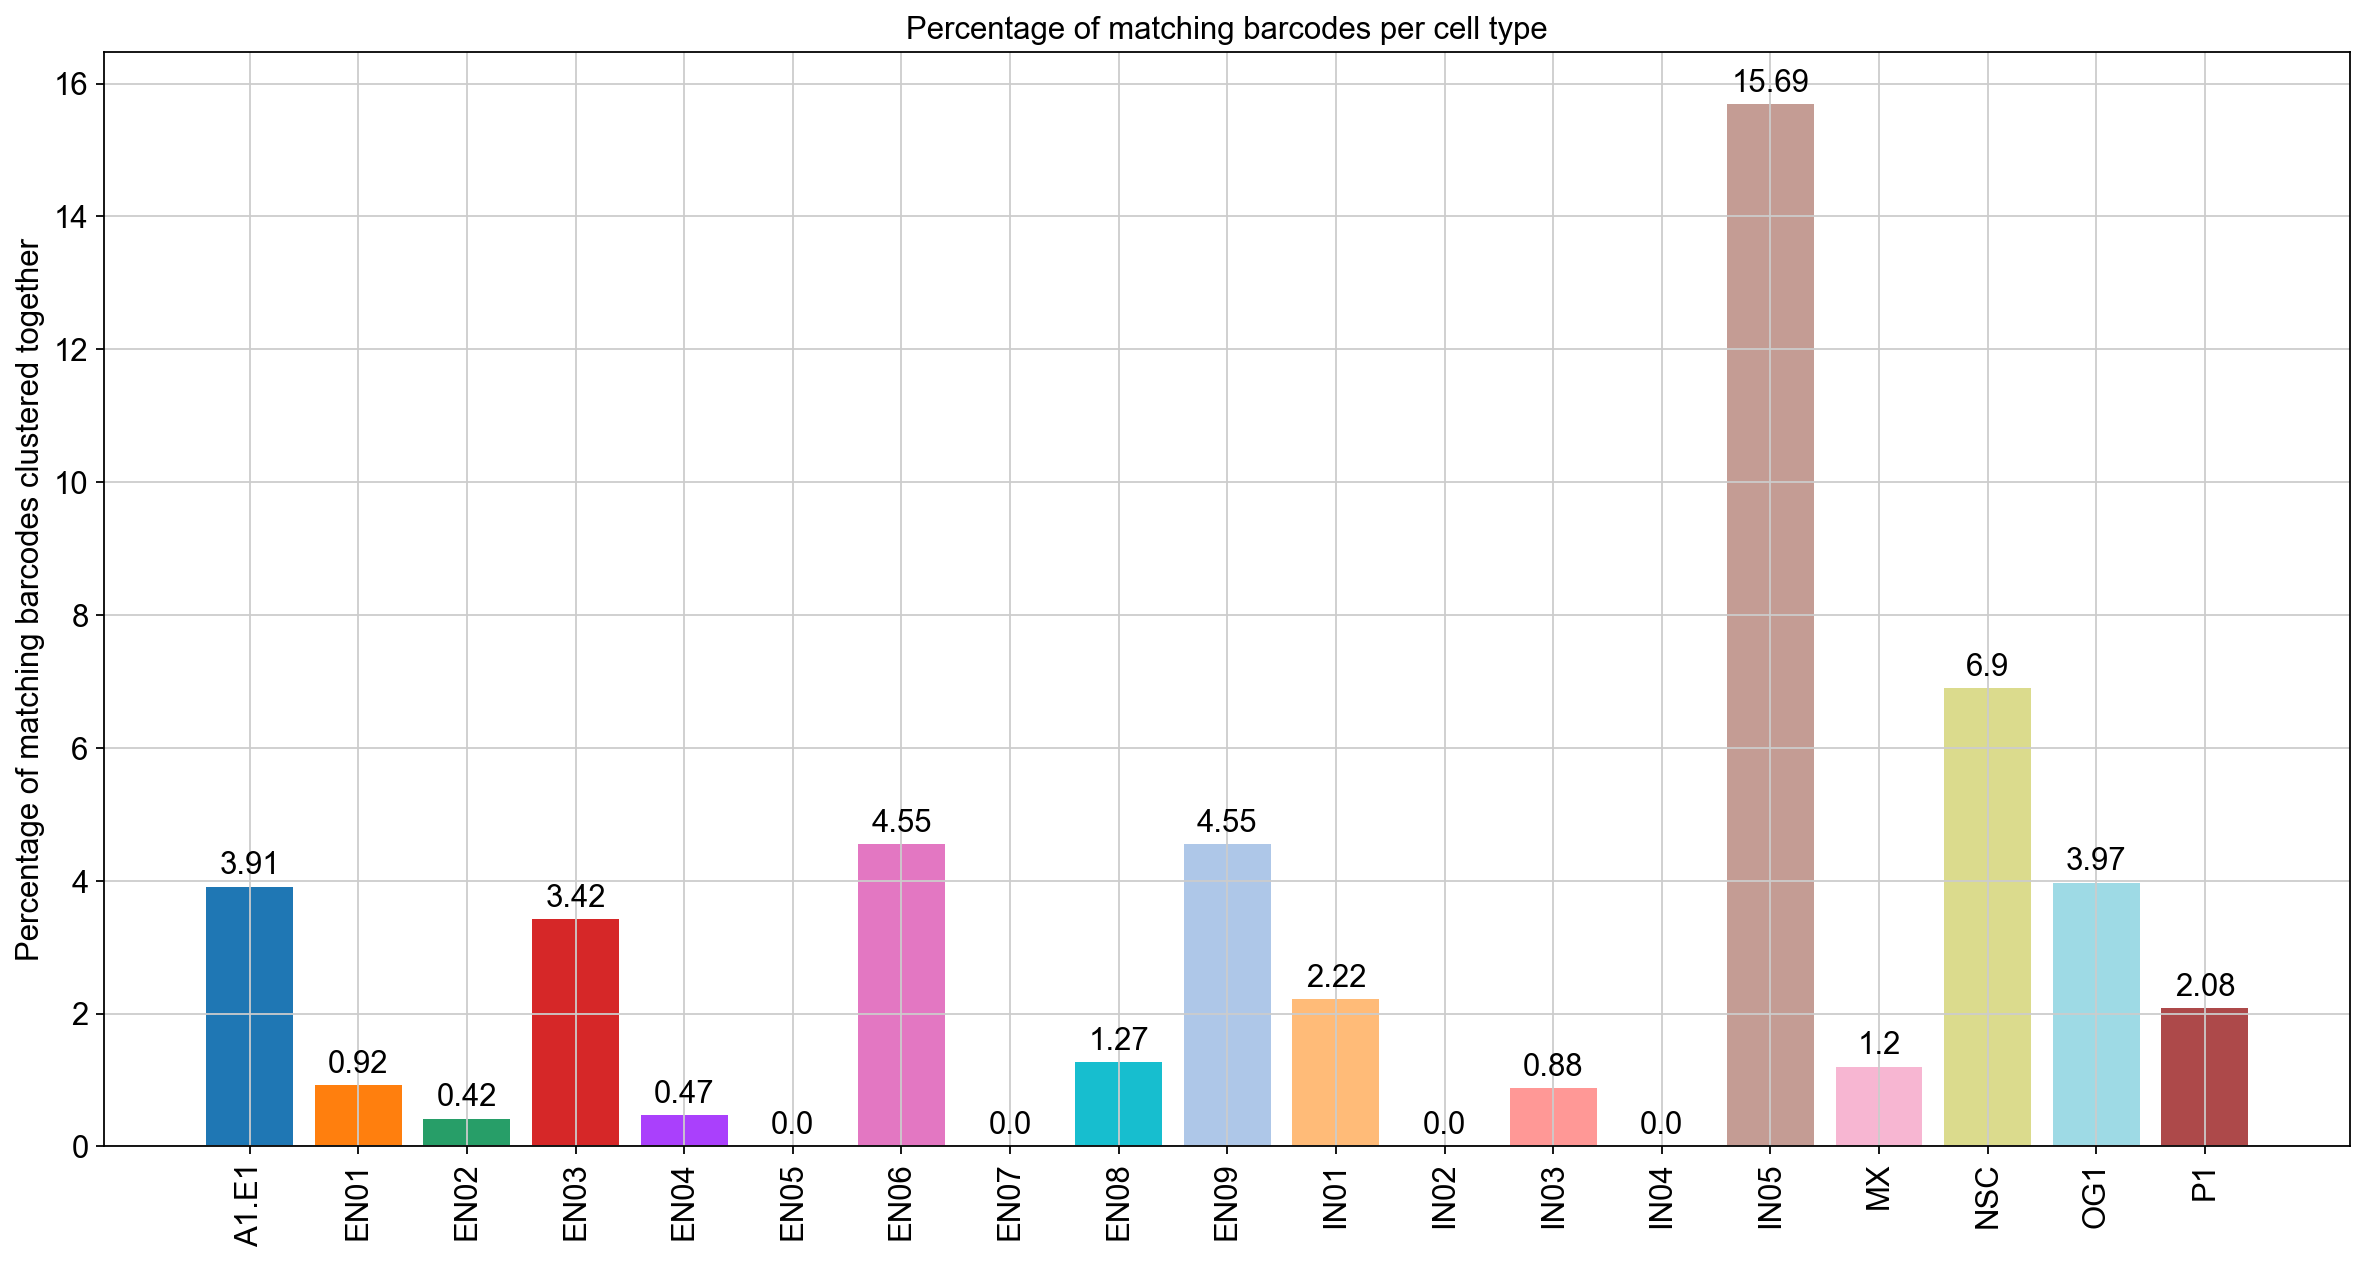

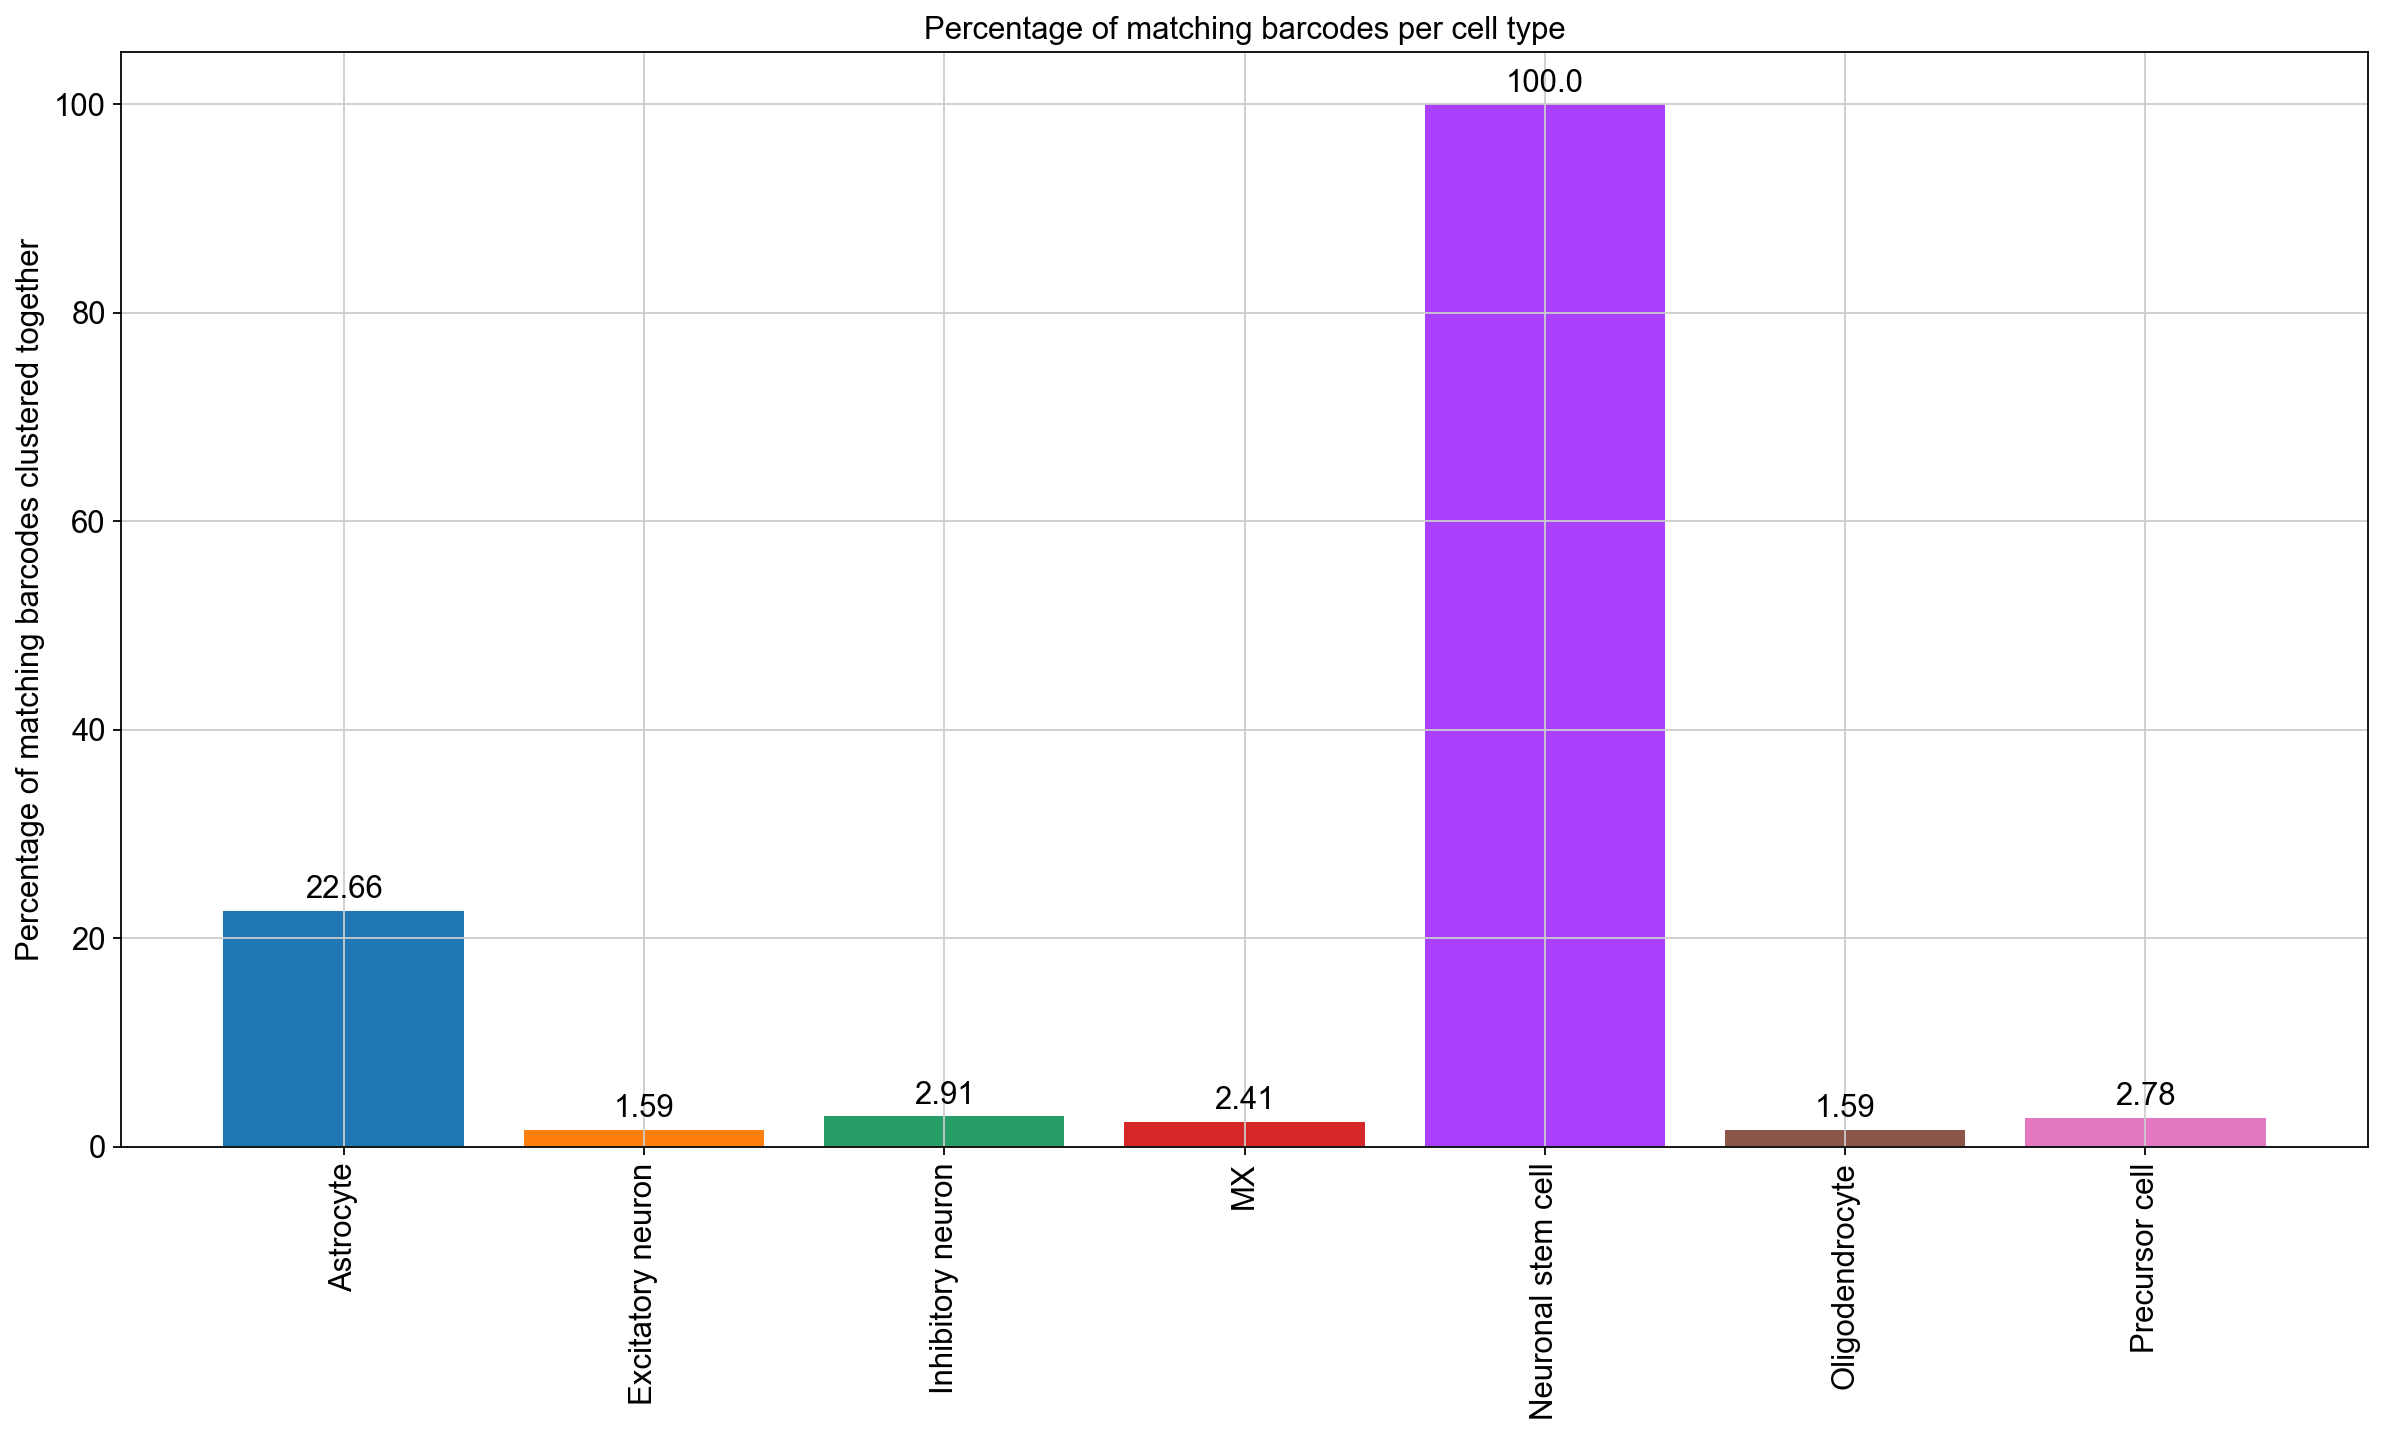

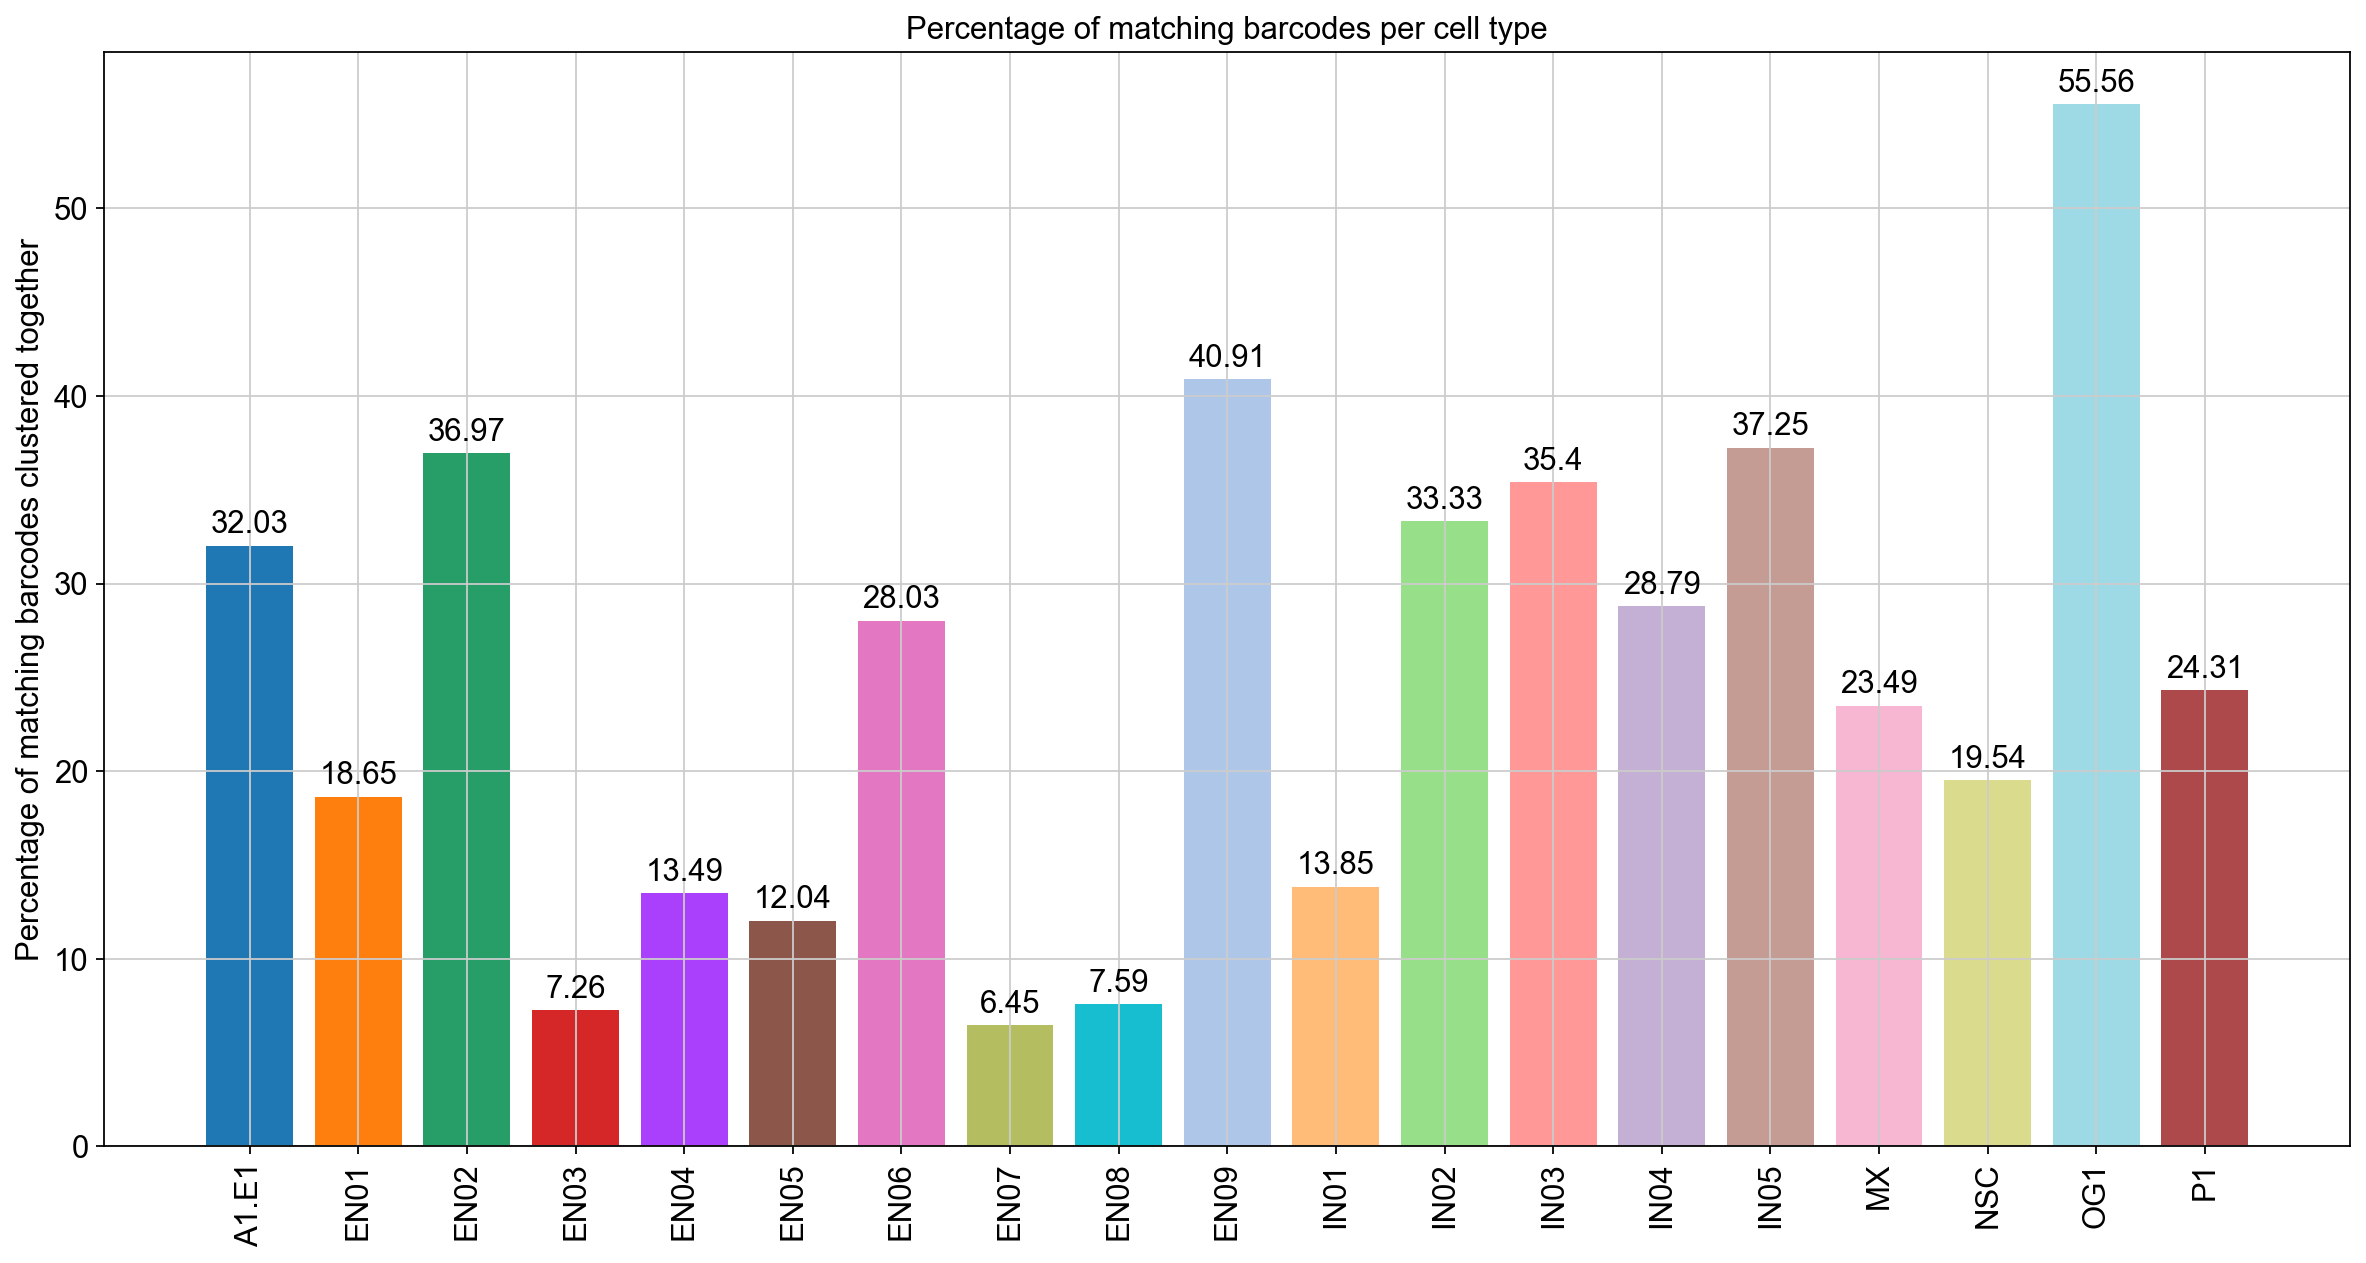

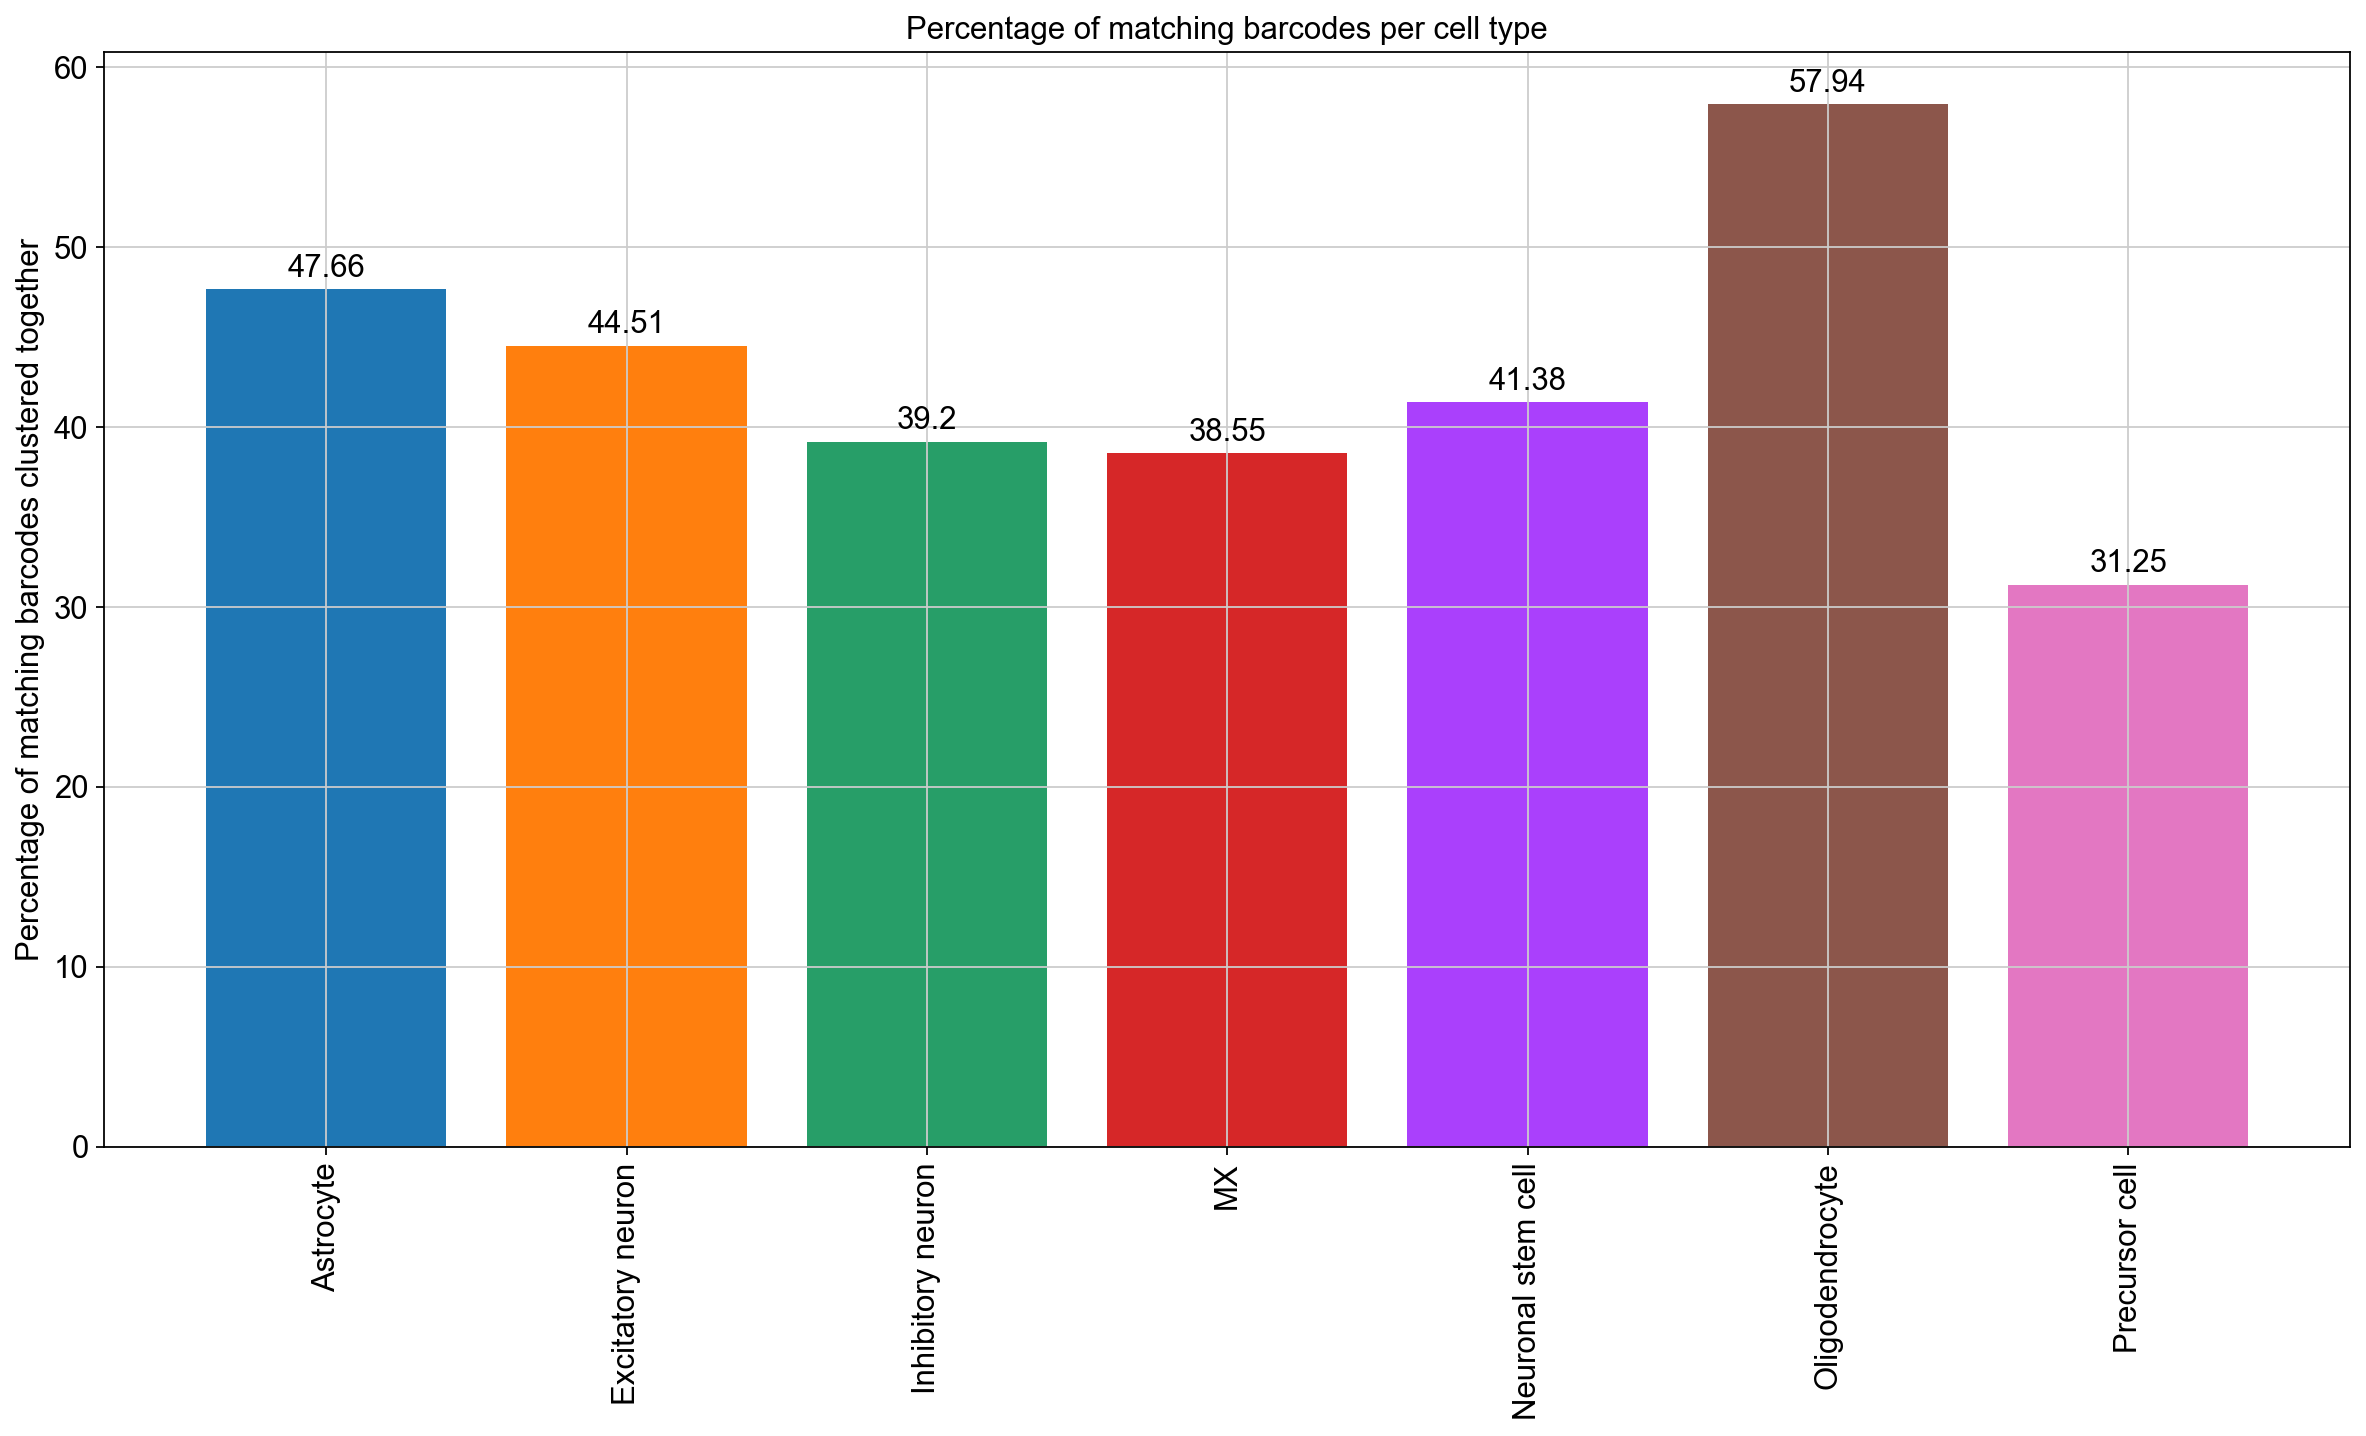

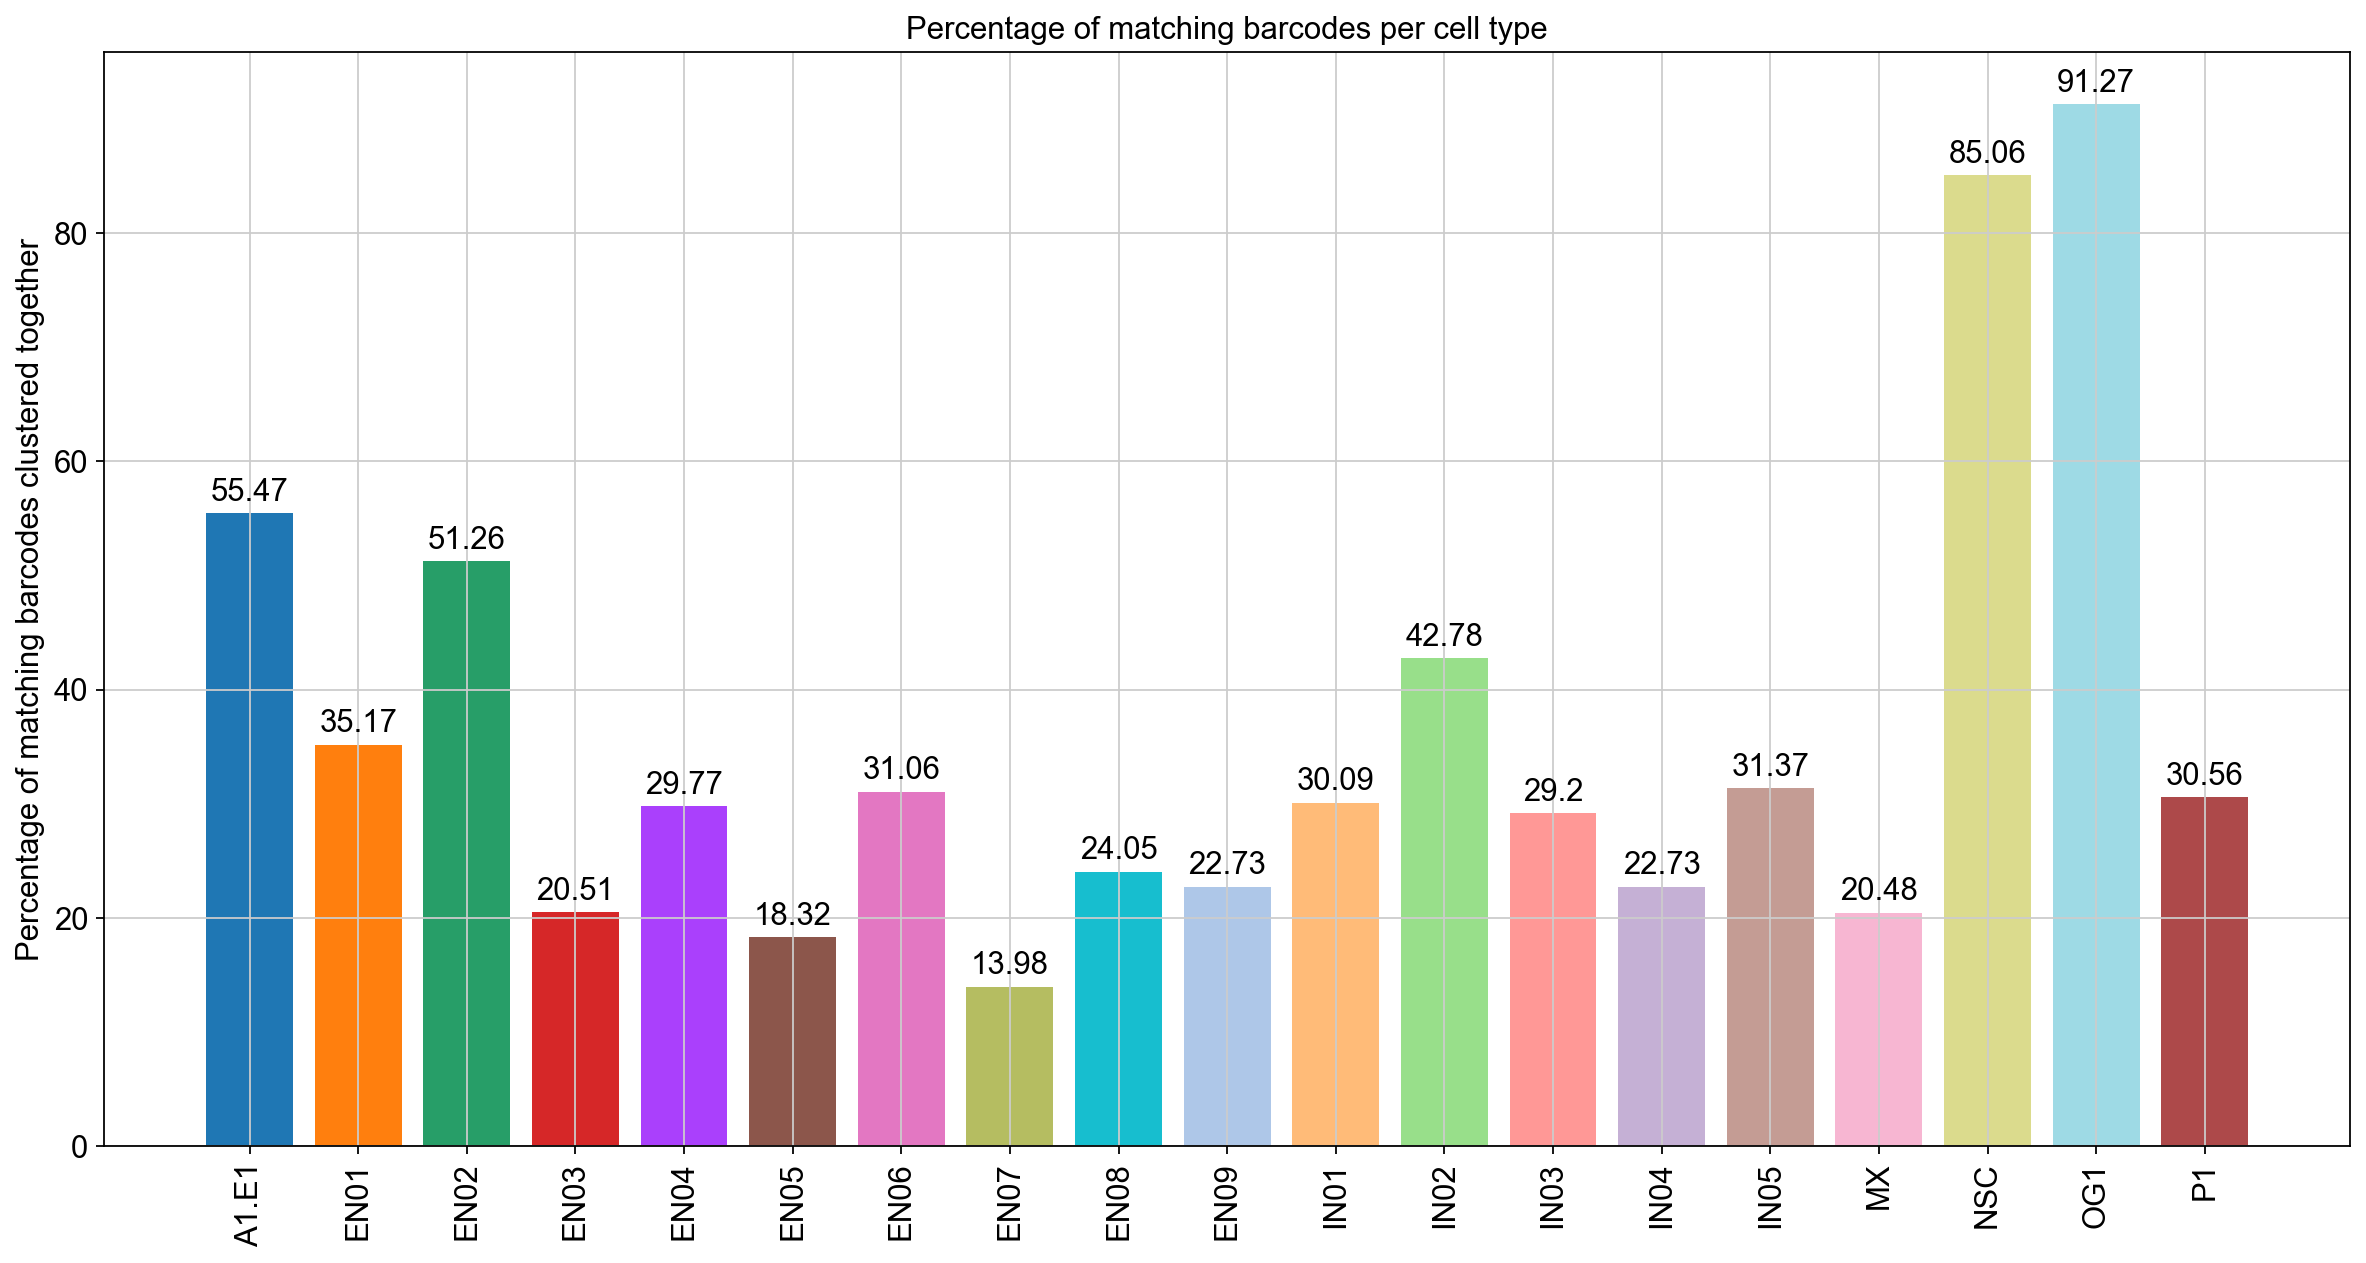

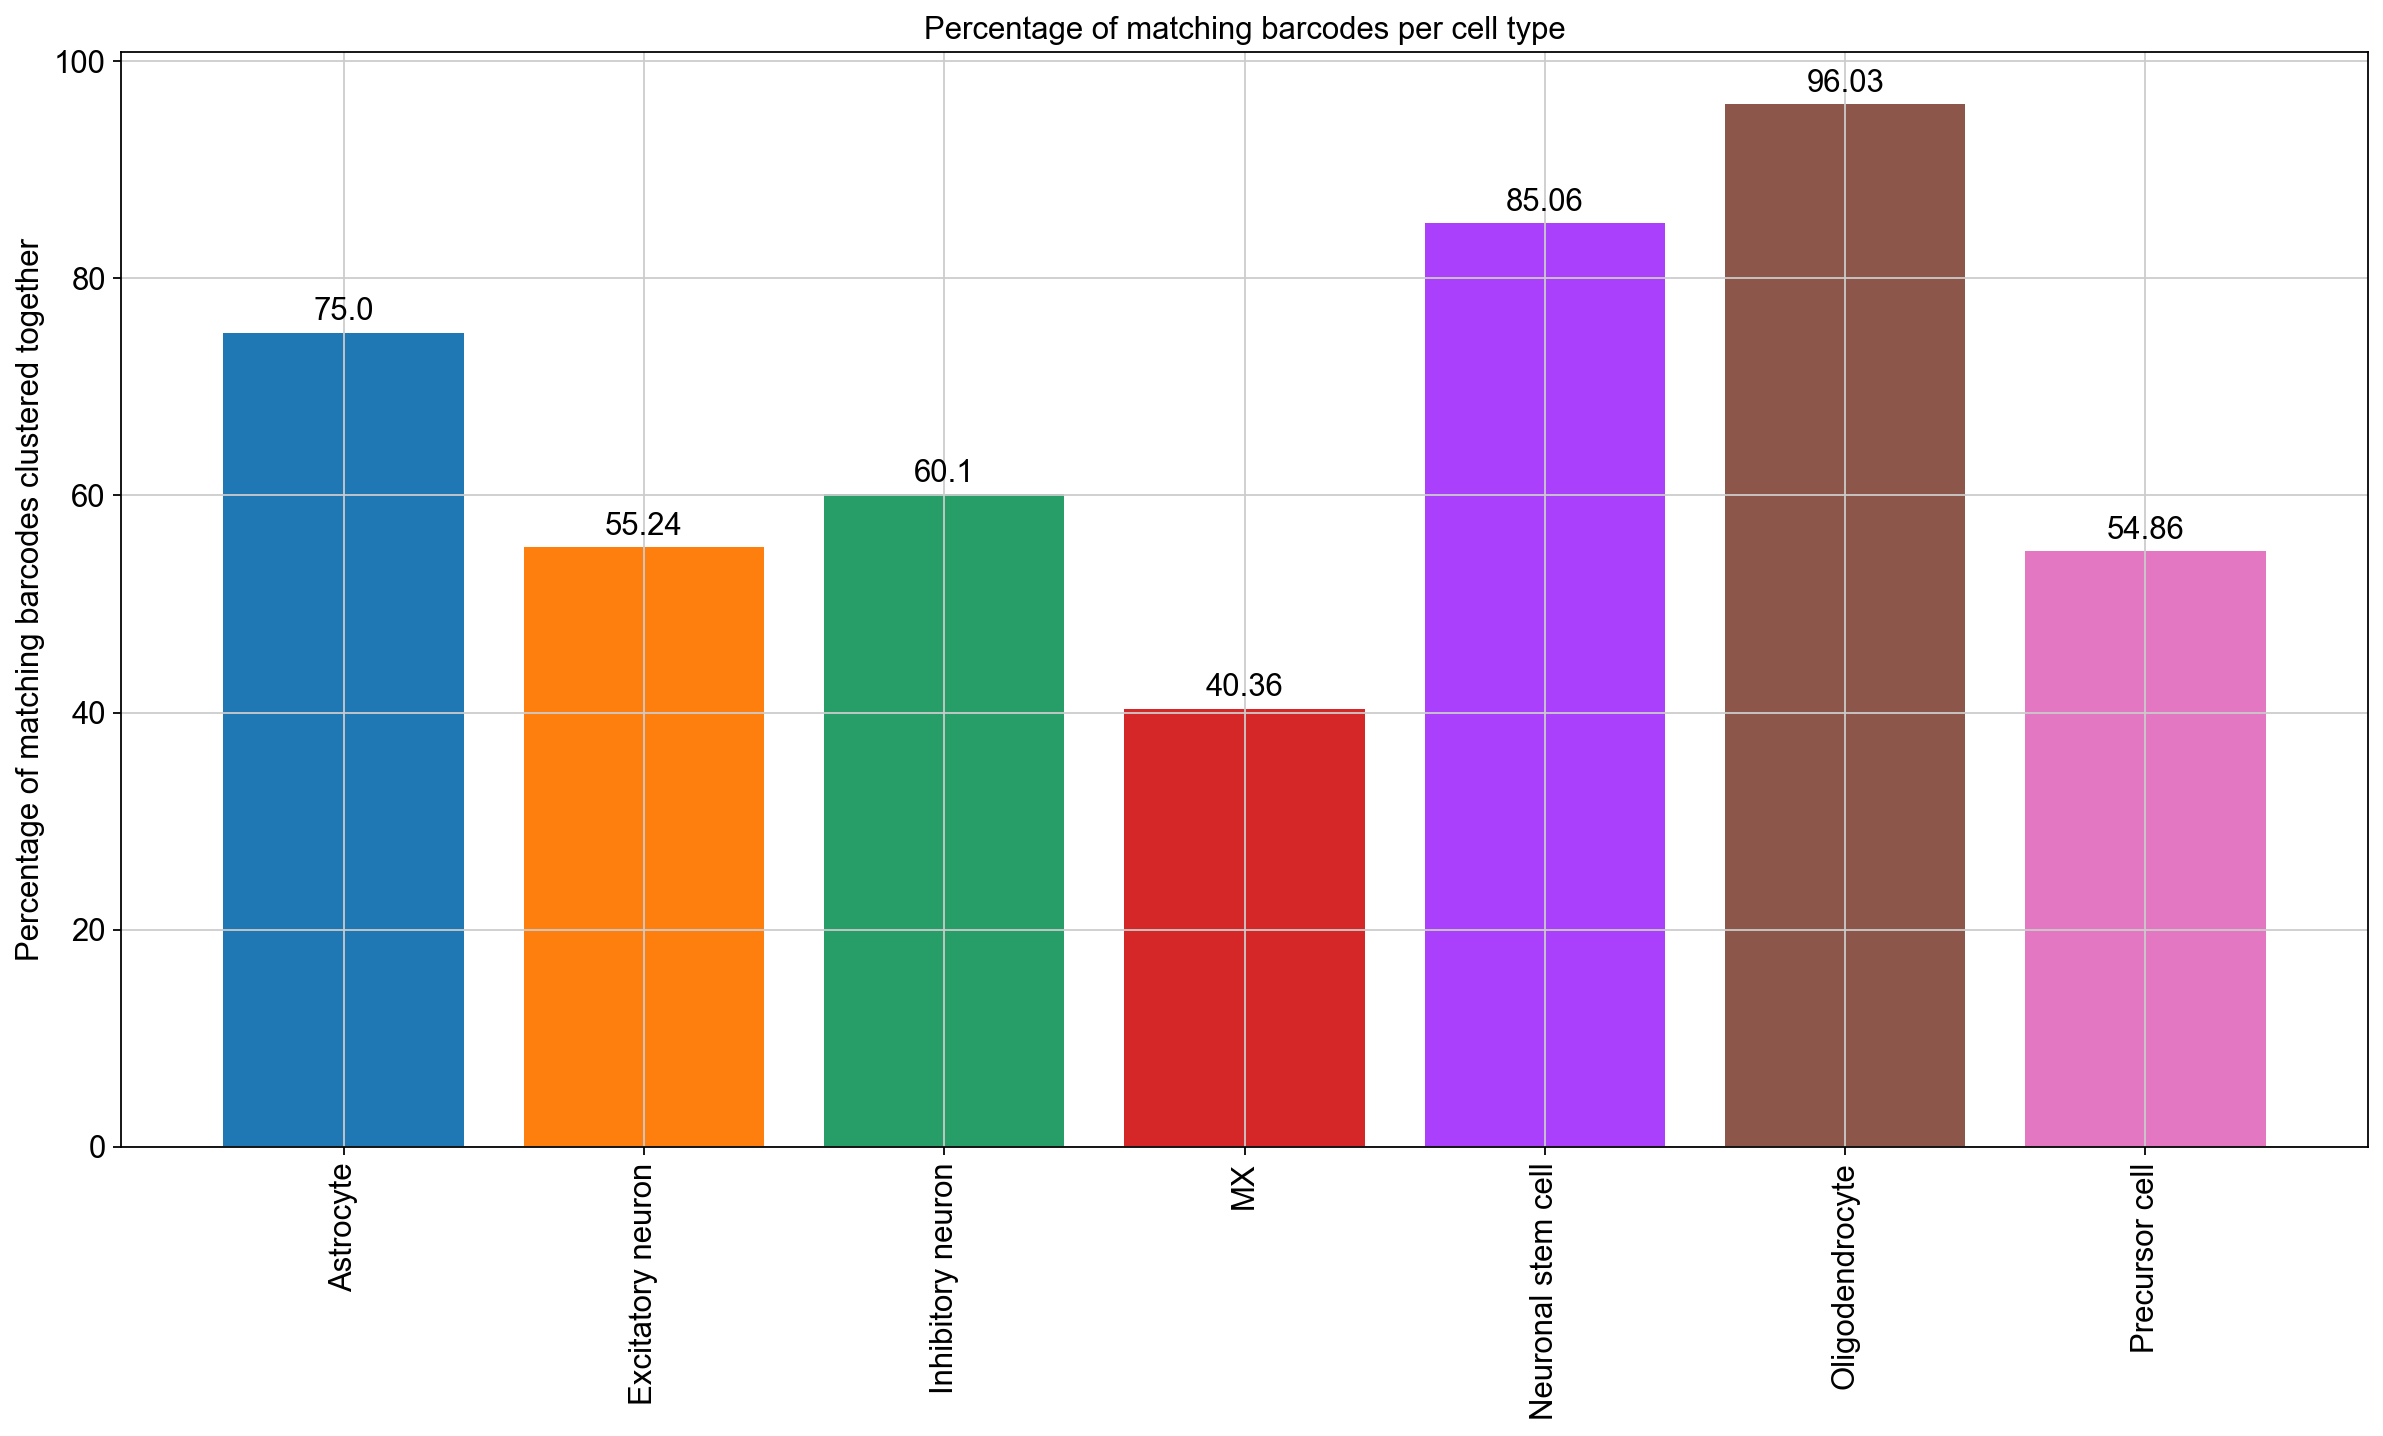

In [36]:
# paper cell type
accSS = accuracy_paired_omics_per_cell_type(adataBrUnint,
                                            omic_layer='orig.ident',
                                            variable='louvain_19',
                                            cell_type='paper_cell_type',
                                            cell_name='matching_barcodes',
                                           percent=True)
plot_accuracy_per_cell_type(adataBrUnint,
                            accSS,
                            cell_type='paper_cell_type',
                            display_value =True,
                            show = True,
                            save='Brain_Unintegrated_accuracy_per_cell_type.png')
plot_accuracy_per_cell_type(adataBrUnint,
                            accSS,
                            cell_type='paper_cell_type',
                            show = False,
                            display_value =True,
                            save='Brain_Unintegrated_accuracy_per_cell_type.pdf')

# broad_cell_type_annotation
accSS = accuracy_paired_omics_per_cell_type(adataBrUnint,
                                            omic_layer='orig.ident',
                                            variable='louvain_7',
                                            cell_type='broad_cell_type_annotation',
                                            cell_name='matching_barcodes',
                                           percent=True)
plot_accuracy_per_cell_type(adataBrUnint,
                            accSS,
                            cell_type='broad_cell_type_annotation',
                            display_value =True,
                            show = True,
                            save='Brain_Unintegrated_accuracy_per_broad_cell_type_annotation.png')
plot_accuracy_per_cell_type(adataBrUnint,
                            accSS,
                            cell_type='broad_cell_type_annotation',
                            show = False,
                            display_value =True,
                            save='Brain_Unintegrated_accuracy_per_broad_cell_type_annotation.pdf')

# paper cell type
accSS = accuracy_paired_omics_per_cell_type(adataBrLig,
                                            omic_layer='orig.ident',
                                            variable='louvain_19',
                                            cell_type='paper_cell_type',
                                            cell_name='matching_barcodes',
                                           percent=True)
plot_accuracy_per_cell_type(adataBrLig,
                            accSS,
                            cell_type='paper_cell_type',
                            display_value =True,
                            show = True,
                            save='Brain_Liger_accuracy_per_cell_type.png')
plot_accuracy_per_cell_type(adataBrLig,
                            accSS,
                            cell_type='paper_cell_type',
                            show = False,
                            display_value =True,
                            save='Brain_Liger_accuracy_per_cell_type.pdf')

# broad_cell_type_annotation
accSS = accuracy_paired_omics_per_cell_type(adataBrLig,
                                            omic_layer='orig.ident',
                                            variable='louvain_7',
                                            cell_type='broad_cell_type_annotation',
                                            cell_name='matching_barcodes',
                                           percent=True)
plot_accuracy_per_cell_type(adataBrLig,
                            accSS,
                            cell_type='broad_cell_type_annotation',
                            display_value =True,
                            show = True,
                            save='Brain_Liger_accuracy_per_broad_cell_type_annotation.png')
plot_accuracy_per_cell_type(adataBrLig,
                            accSS,
                            cell_type='broad_cell_type_annotation',
                            show = False,
                            display_value =True,
                            save='Brain_Liger_accuracy_per_broad_cell_type_annotation.pdf')

# paper cell type
accSS = accuracy_paired_omics_per_cell_type(adataBrSeu,
                                            omic_layer='orig.ident',
                                            variable='louvain_19',
                                            cell_type='paper_cell_type',
                                            cell_name='matching_barcodes',
                                           percent=True)
plot_accuracy_per_cell_type(adataBrSeu,
                            accSS,
                            cell_type='paper_cell_type',
                            display_value =True,
                            show = True,
                            save='Brain_Seurat_accuracy_per_cell_type.png')
plot_accuracy_per_cell_type(adataBrSeu,
                            accSS,
                            cell_type='paper_cell_type',
                            show = False,
                            display_value =True,
                            save='Brain_Seurat_accuracy_per_cell_type.pdf')

# broad_cell_type_annotation
accSS = accuracy_paired_omics_per_cell_type(adataBrSeu,
                                            omic_layer='orig.ident',
                                            variable='louvain_7',
                                            cell_type='broad_cell_type_annotation',
                                            cell_name='matching_barcodes',
                                           percent=True)
plot_accuracy_per_cell_type(adataBrSeu,
                            accSS,
                            cell_type='broad_cell_type_annotation',
                            display_value =True,
                            show = True,
                            save='Brain_Seurat_accuracy_per_broad_cell_type_annotation.png')
plot_accuracy_per_cell_type(adataBrSeu,
                            accSS,
                            cell_type='broad_cell_type_annotation',
                            show = False,
                            display_value =True,
                            save='Brain_Seurat_accuracy_per_broad_cell_type_annotation.pdf')
del accSS

### Accuracy metrics - per cell type - skin

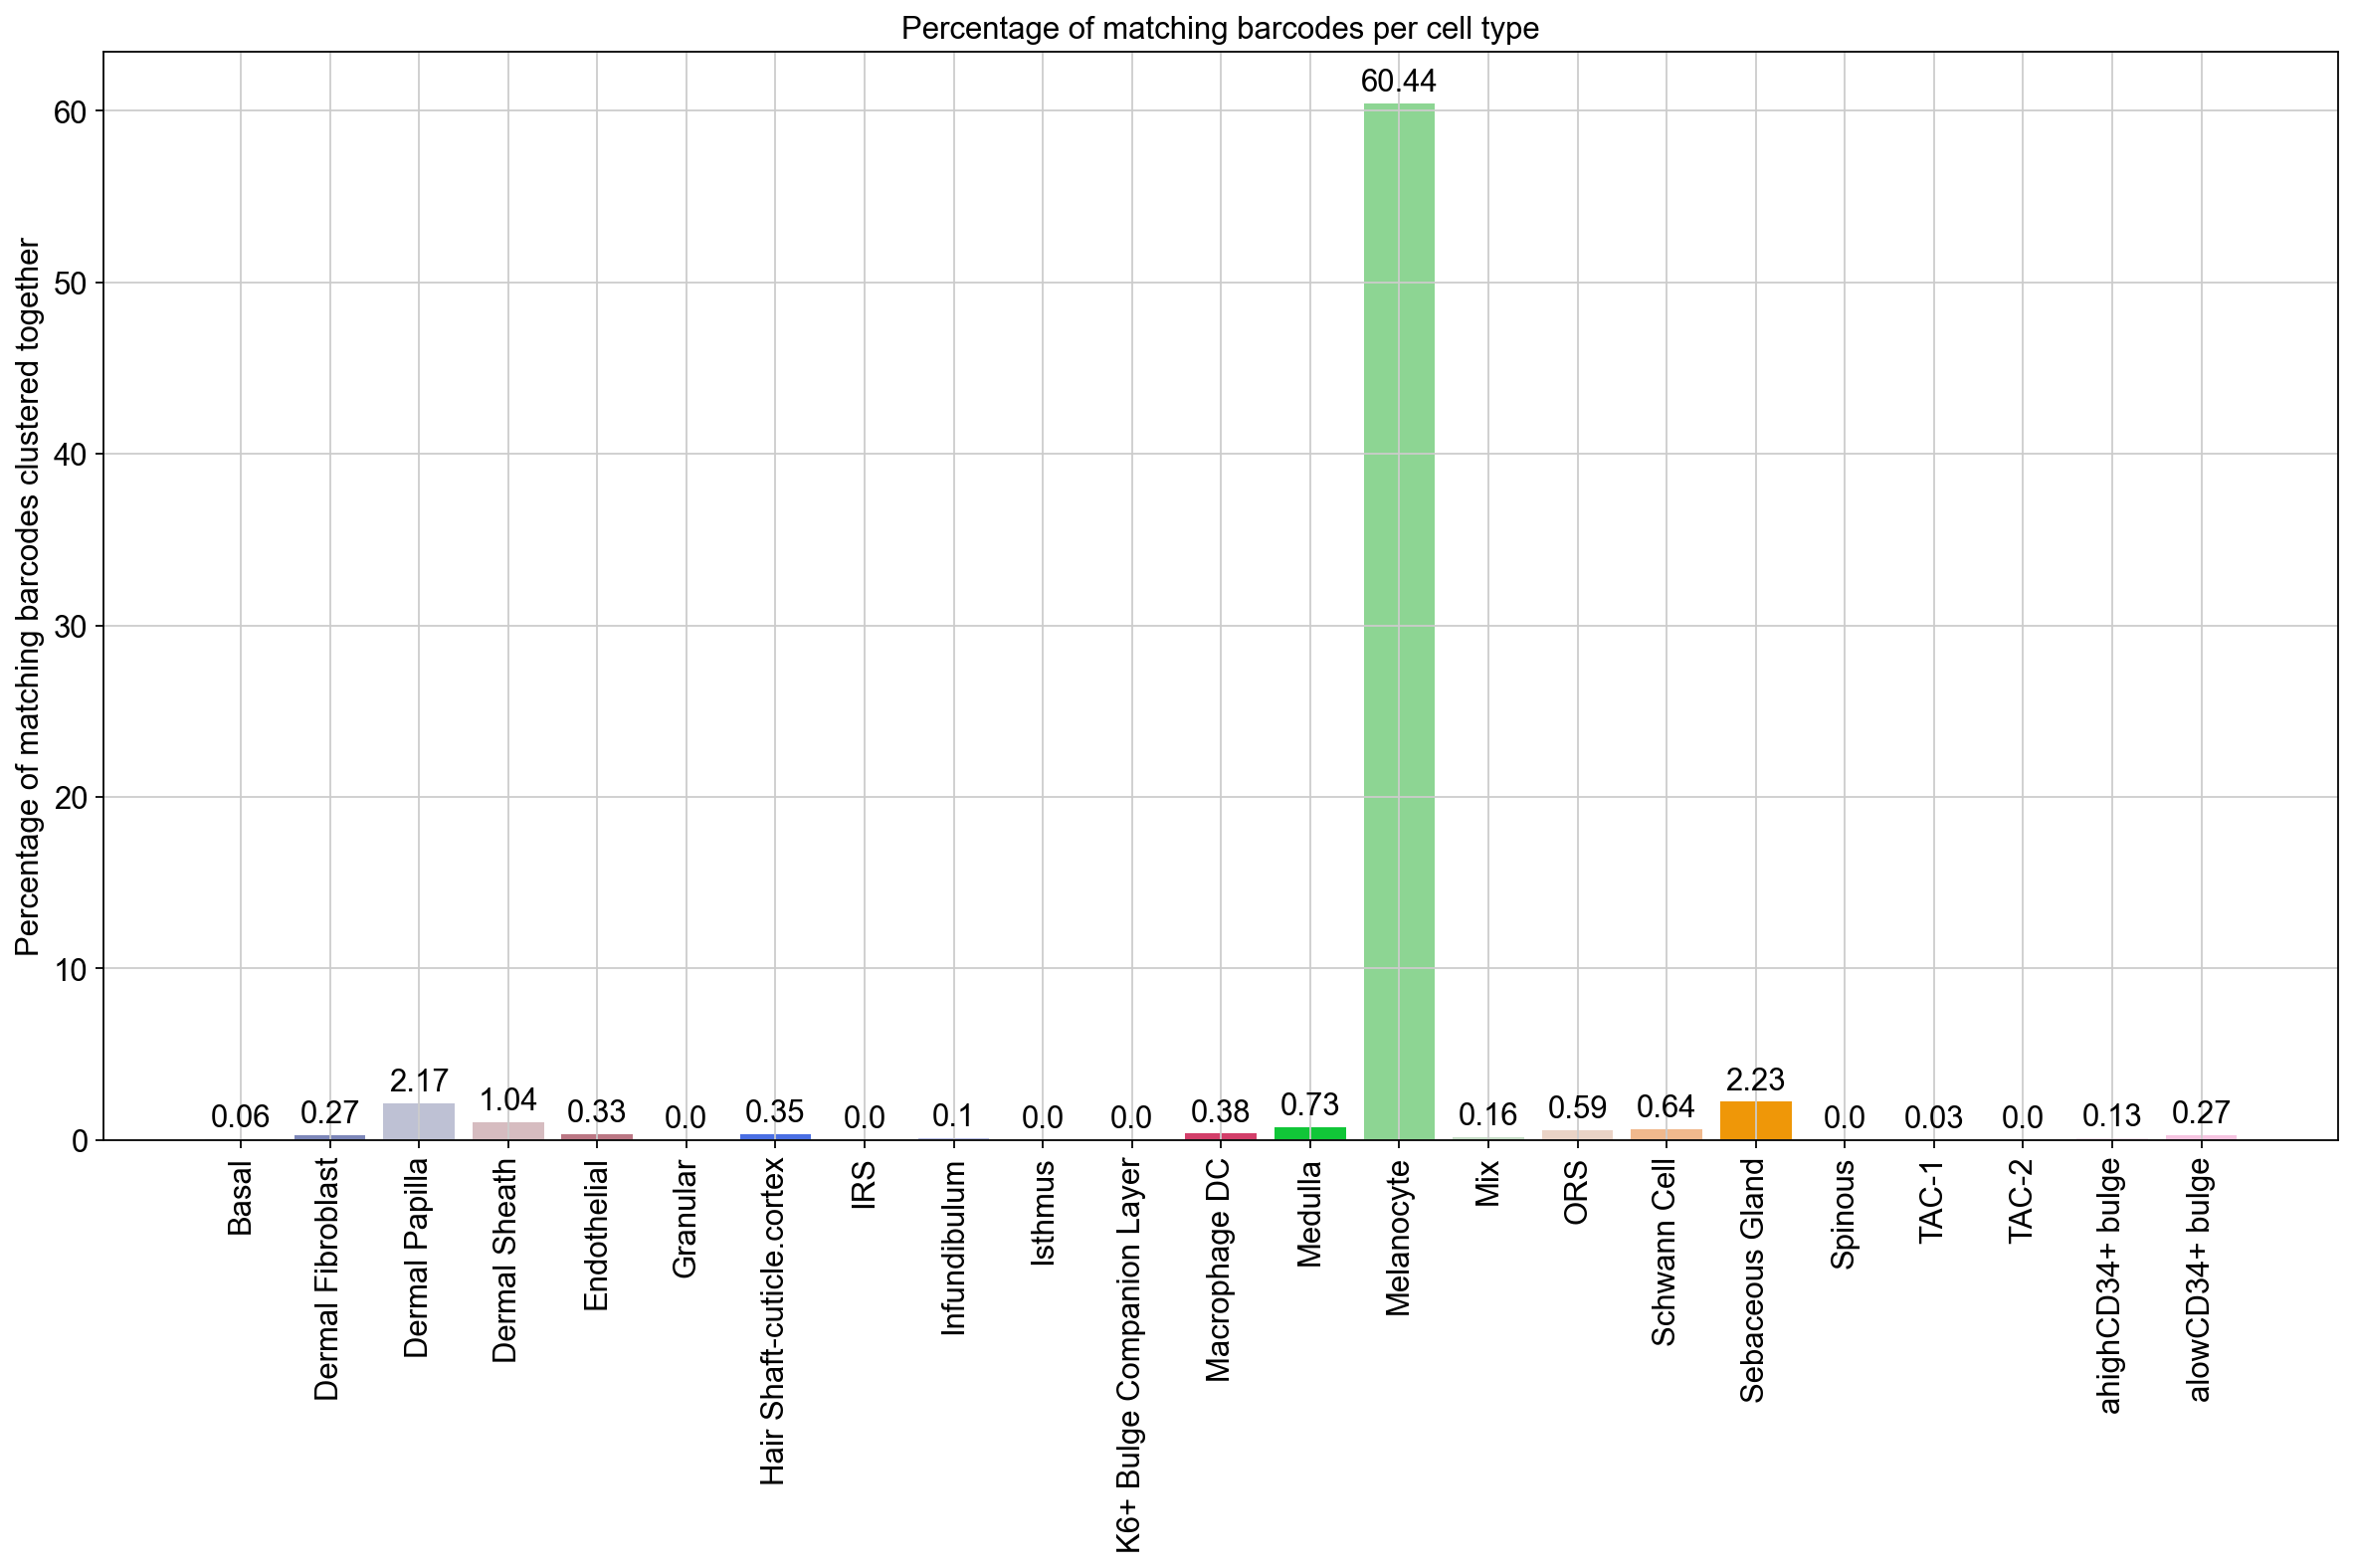

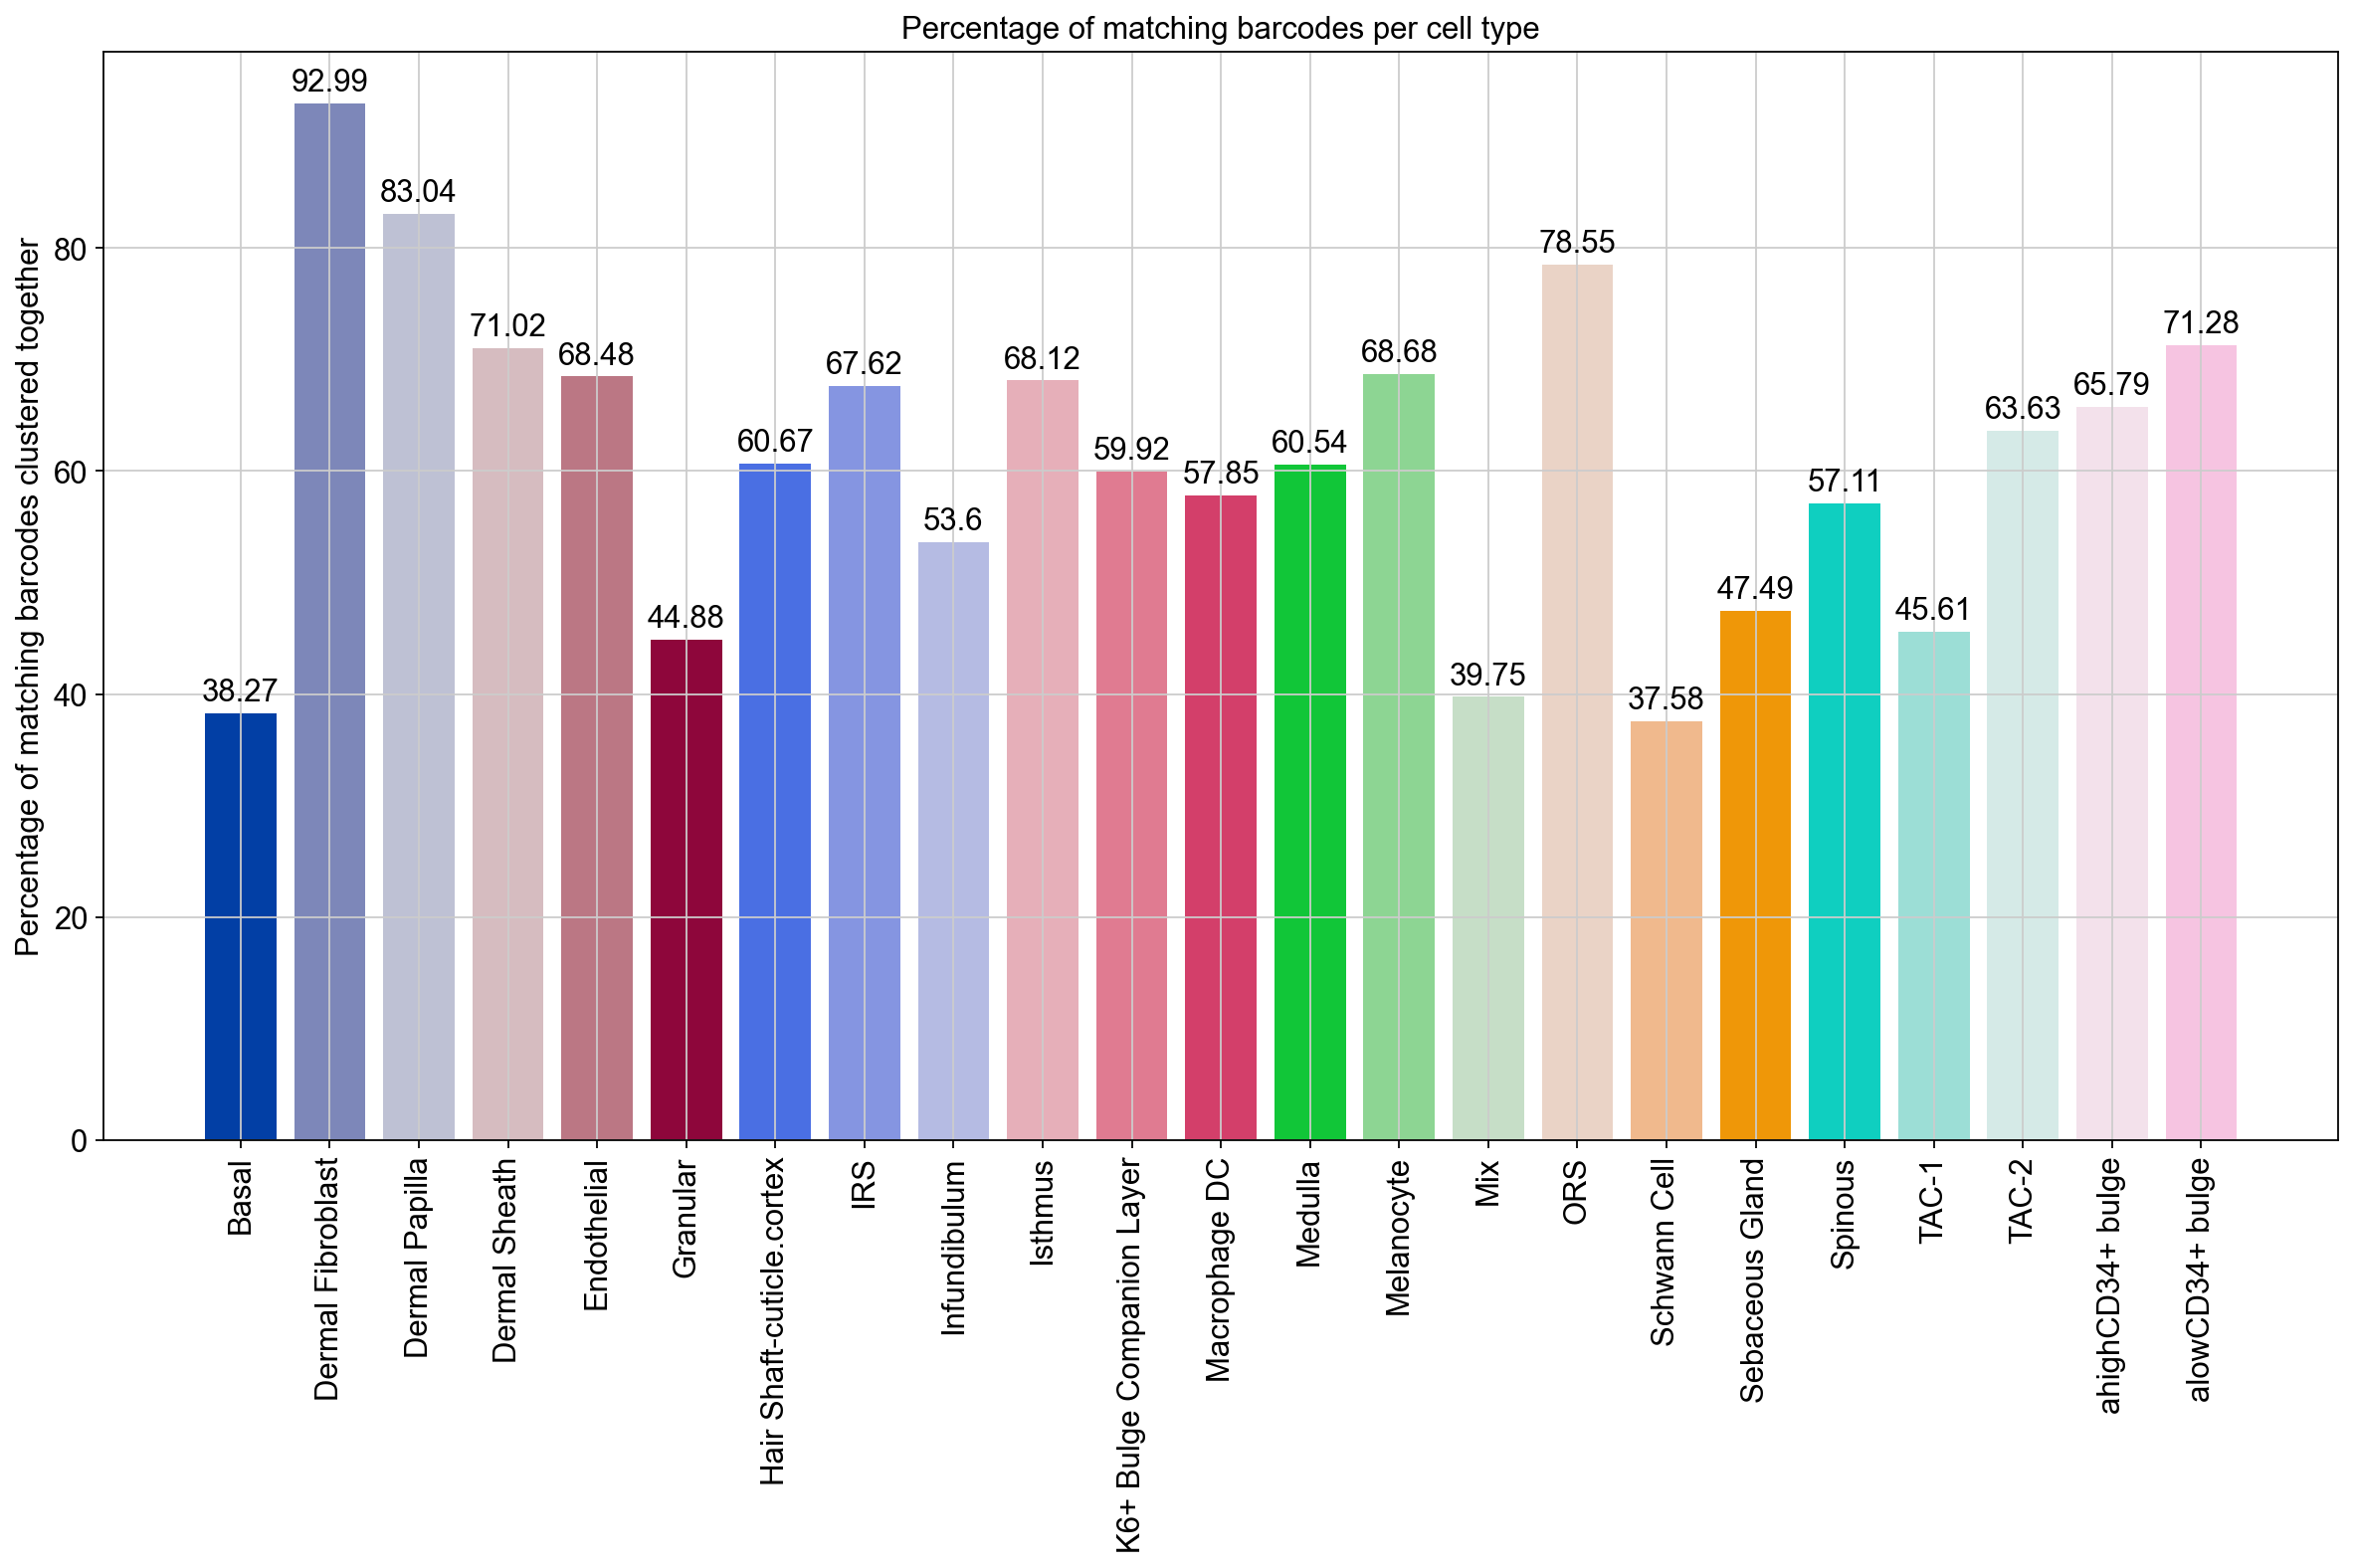

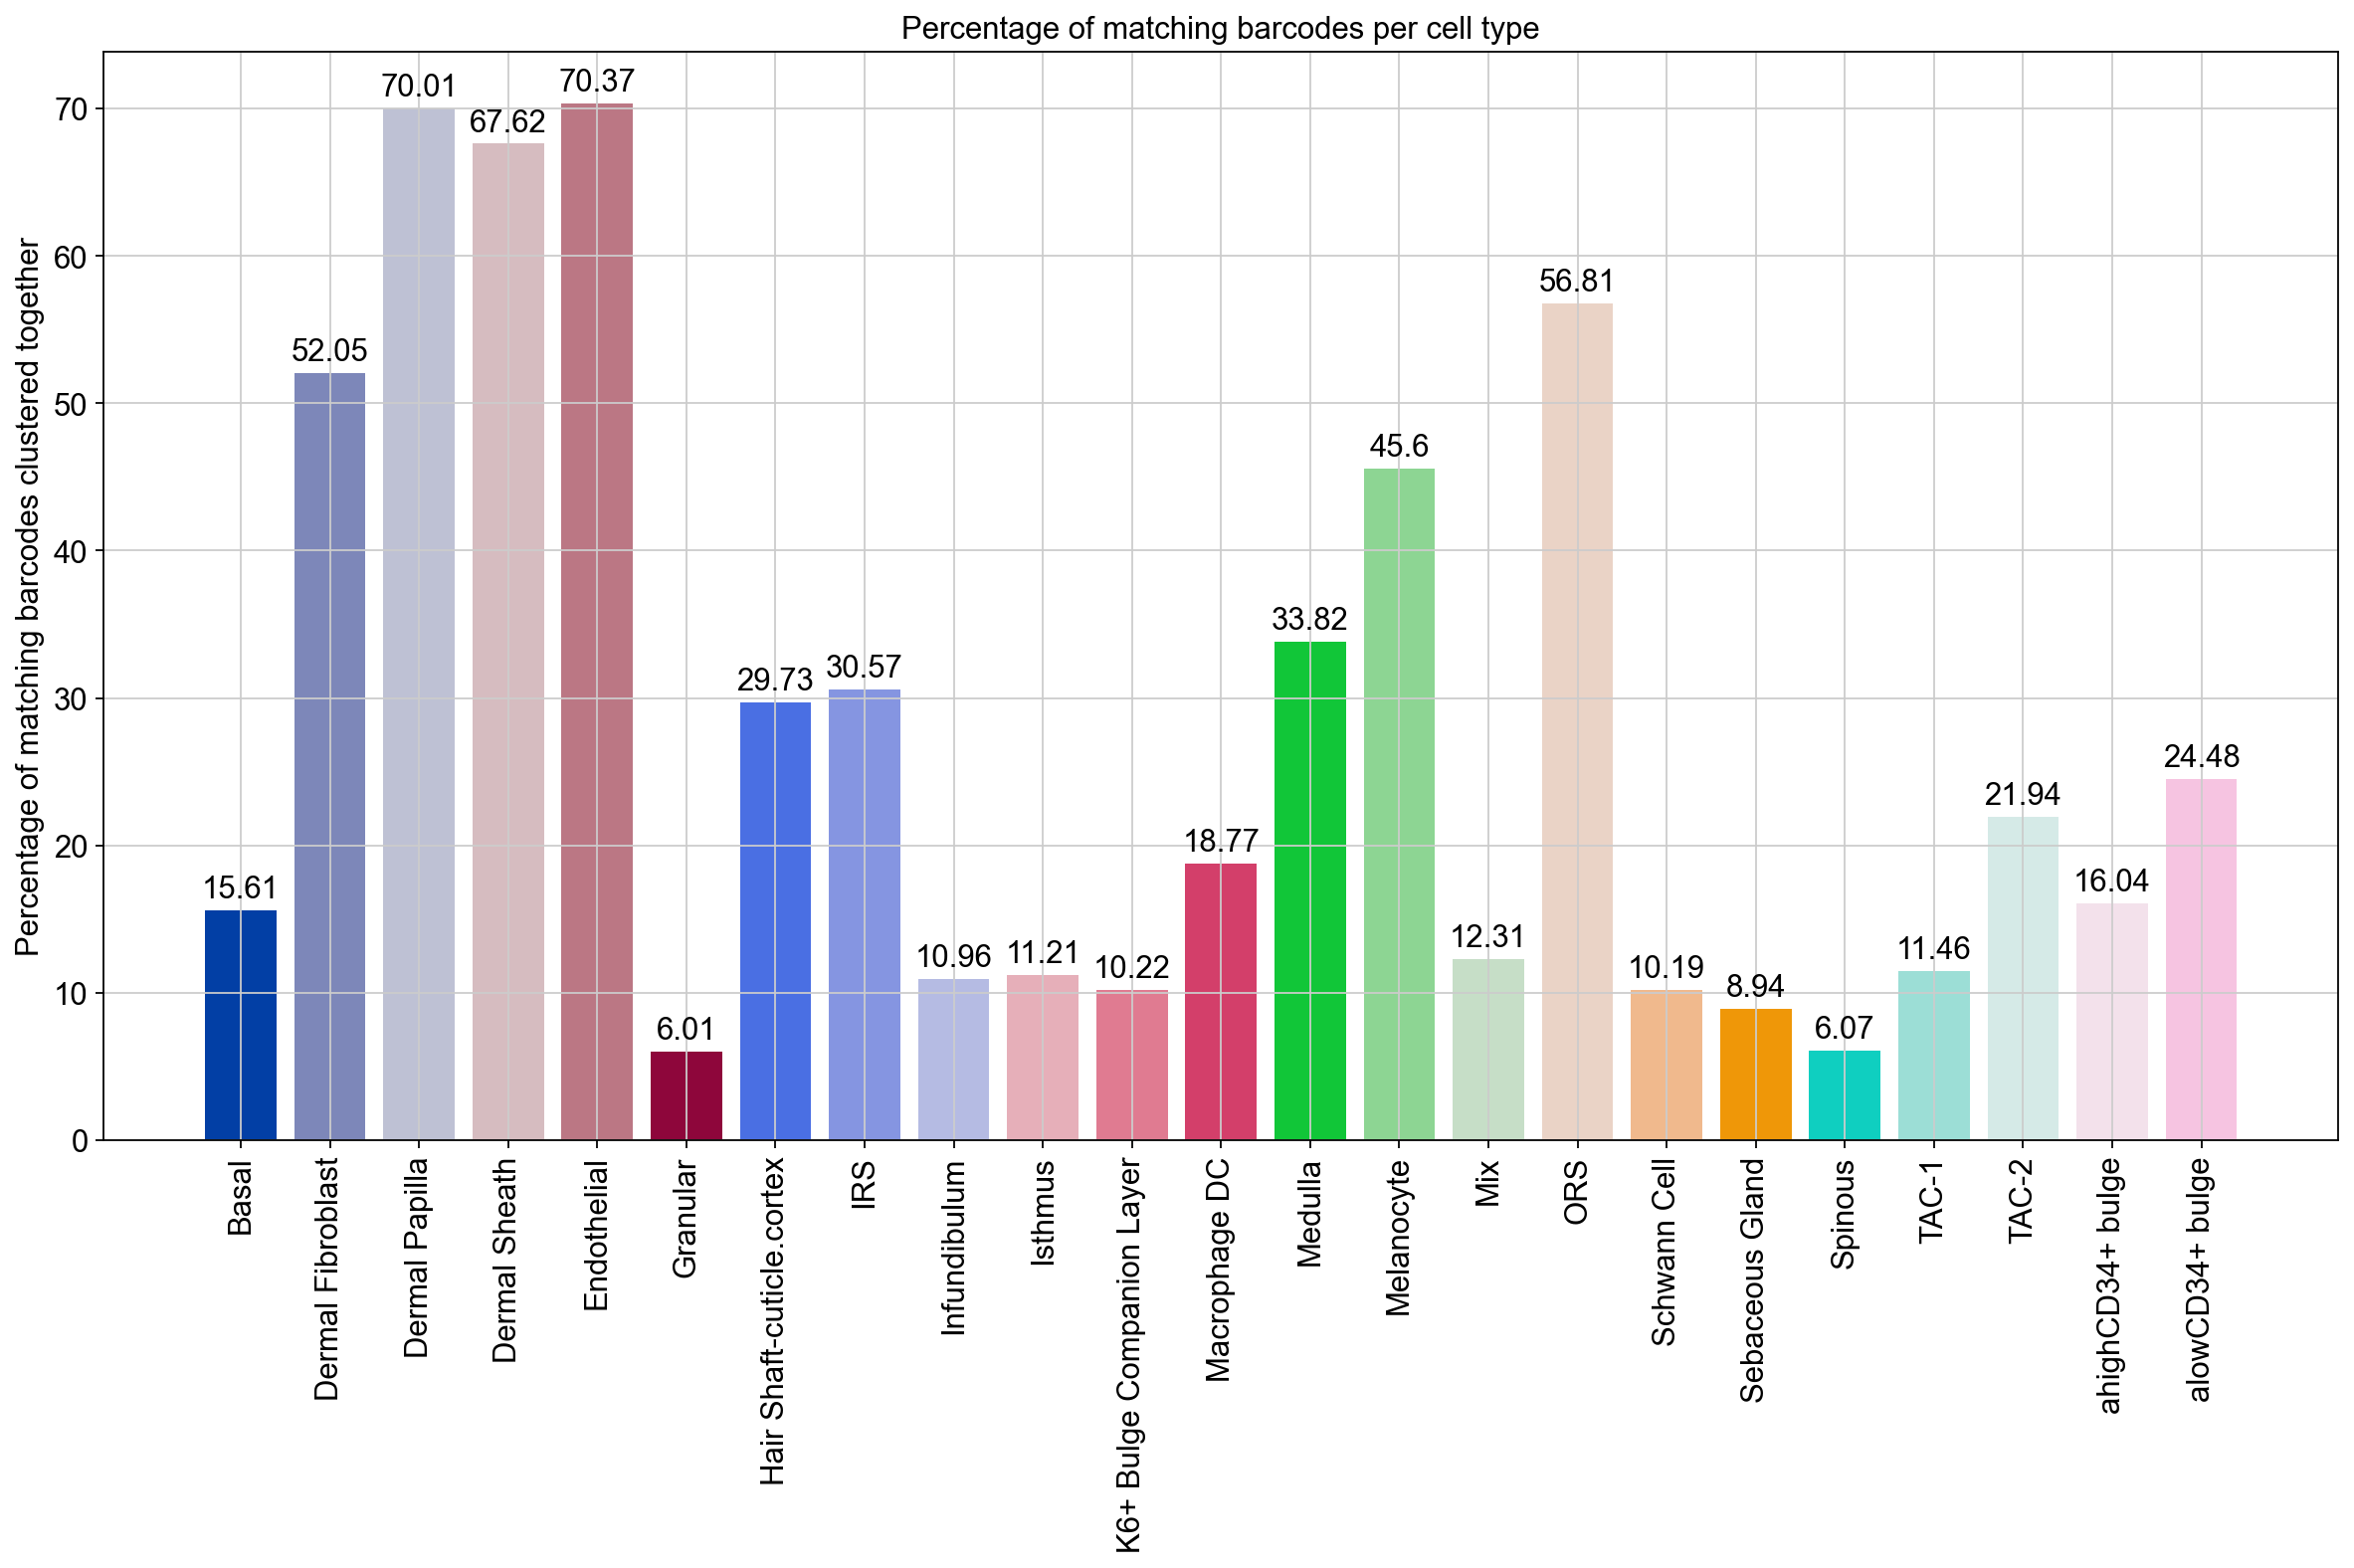

In [37]:
# paper cell type
accSS = accuracy_paired_omics_per_cell_type(adataSkUnint,
                                            omic_layer='orig.ident',
                                            variable='louvain_23',
                                            cell_type='paper_cell_type',
                                            cell_name='matching_barcodes',
                                           percent=True)
plot_accuracy_per_cell_type(adataSkUnint,
                            accSS,
                            cell_type='paper_cell_type',
                            display_value =True,
                            show = True,
                            save='Skin_Unintegrated_accuracy_per_cell_type.png')
plot_accuracy_per_cell_type(adataSkUnint,
                            accSS,
                            cell_type='paper_cell_type',
                            show = False,
                            display_value =True,
                            save='Skin_Unintegrated_accuracy_per_cell_type.pdf')

# paper cell type
accSS = accuracy_paired_omics_per_cell_type(adataSkSeu,
                                            omic_layer='orig.ident',
                                            variable='louvain_23',
                                            cell_type='paper_cell_type',
                                            cell_name='matching_barcodes',
                                           percent=True)
plot_accuracy_per_cell_type(adataSkSeu,
                            accSS,
                            cell_type='paper_cell_type',
                            display_value =True,
                            show = True,
                            save='Skin_Seurat_accuracy_per_cell_type.png')
plot_accuracy_per_cell_type(adataSkSeu,
                            accSS,
                            cell_type='paper_cell_type',
                            show = False,
                            display_value =True,
                            save='Skin_Seurat_accuracy_per_cell_type.pdf')

# paper cell type
accSS = accuracy_paired_omics_per_cell_type(adataSkLig,
                                            omic_layer='orig.ident',
                                            variable='louvain_23',
                                            cell_type='paper_cell_type',
                                            cell_name='matching_barcodes',
                                           percent=True)
plot_accuracy_per_cell_type(adataSkLig,
                            accSS,
                            cell_type='paper_cell_type',
                            display_value =True,
                            show = True,
                            save='Skin_Liger_accuracy_per_cell_type.png')
plot_accuracy_per_cell_type(adataSkLig,
                            accSS,
                            cell_type='paper_cell_type',
                            show = False,
                            display_value =True,
                            save='Skin_Liger_accuracy_per_cell_type.pdf')
del accSS

# Average euclidean distance between matching barcodes

# Brain

In [38]:
adataBrUnint.obs['matching_barcodes'] = [x.split('_')[1] for x in adataBrUnint.obs_names.tolist()]
adataBrSeu.obs['matching_barcodes'] = [x.split('_')[0] for x in adataBrSeu.obs_names.tolist()]
adataBrLig.obs['matching_barcodes'] = [x.split('_')[1] for x in adataBrLig.obs_names.tolist()]

distance_Unintegrated_brain = average_distance_between_matching_barcodes(adataBrUnint,
                                                                         cell_names='matching_barcodes',
                                                                         cell_type=None)

distance_Liger_brain = average_distance_between_matching_barcodes(adataBrLig,
                                                                  cell_names='matching_barcodes',
                                                                  cell_type=None)

distance_Seurat_brain = average_distance_between_matching_barcodes(adataBrSeu,
                                                                   cell_names='matching_barcodes',
                                                                   cell_type=None)
df_metrics_brain['pairwise_distance_barcode_euclidean_absolute'] = [distance_Unintegrated_brain,
                                                           distance_Seurat_brain,
                                                           distance_Liger_brain]
del distance_Unintegrated_brain, distance_Seurat_brain, distance_Liger_brain

In [39]:
adataBrUnint.obs['matching_barcodes'] = [x.split('_')[1] for x in adataBrUnint.obs_names.tolist()]
adataBrSeu.obs['matching_barcodes'] = [x.split('_')[0] for x in adataBrSeu.obs_names.tolist()]
adataBrLig.obs['matching_barcodes'] = [x.split('_')[1] for x in adataBrLig.obs_names.tolist()]

distance_Unintegrated_brain = average_distance_between_matching_barcodes(adataBrUnint,
                                                                         cell_names='matching_barcodes',
                                                                         cell_type=None,
                                                                        absolute=False)

distance_Liger_brain = average_distance_between_matching_barcodes(adataBrLig,
                                                                  cell_names='matching_barcodes',
                                                                  cell_type=None,
                                                                        absolute=False)

distance_Seurat_brain = average_distance_between_matching_barcodes(adataBrSeu,
                                                                   cell_names='matching_barcodes',
                                                                   cell_type=None,
                                                                        absolute=False)

df_metrics_brain['pairwise_distance_barcode_euclidean_relative'] = [distance_Unintegrated_brain,
                                                           distance_Seurat_brain,
                                                           distance_Liger_brain]
del distance_Unintegrated_brain, distance_Seurat_brain, distance_Liger_brain

... storing 'matching_barcodes' as categorical


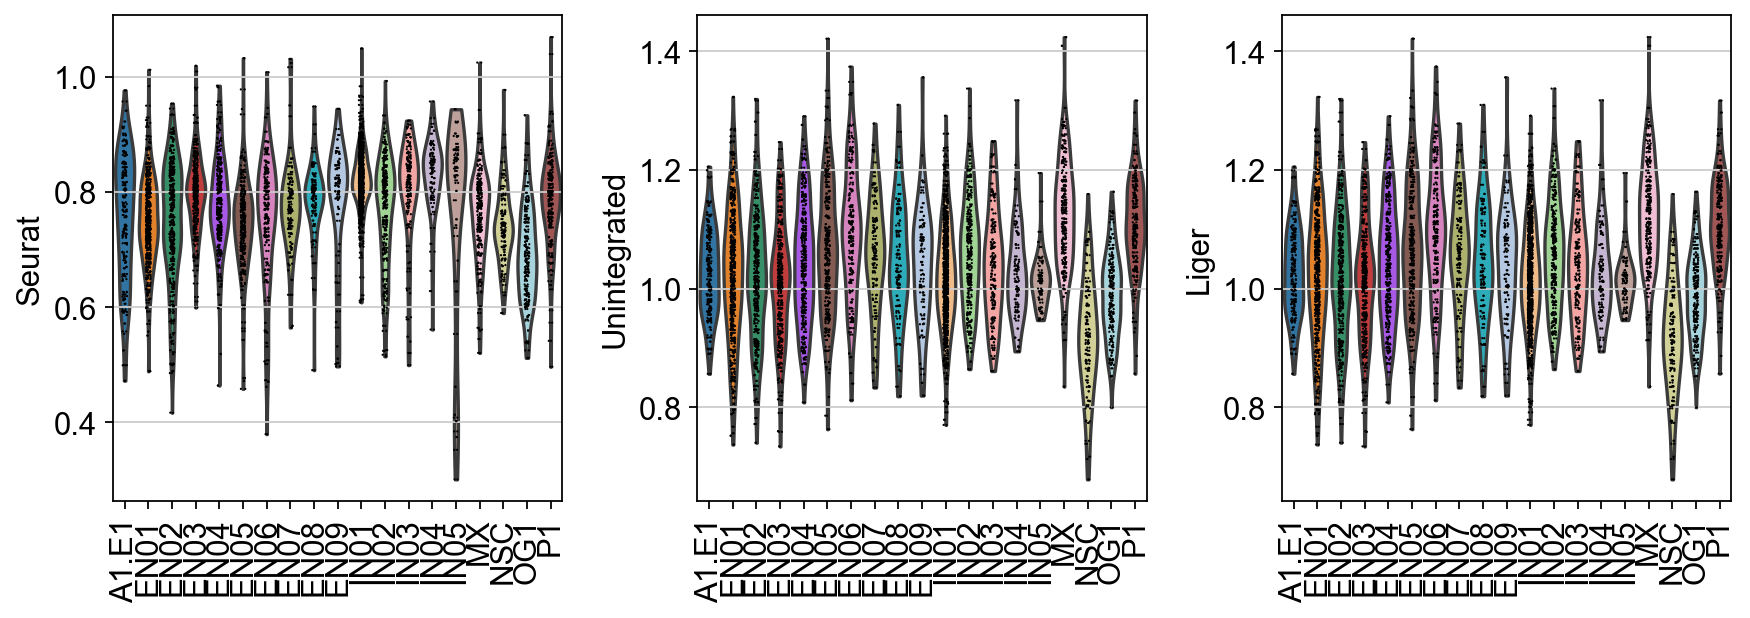

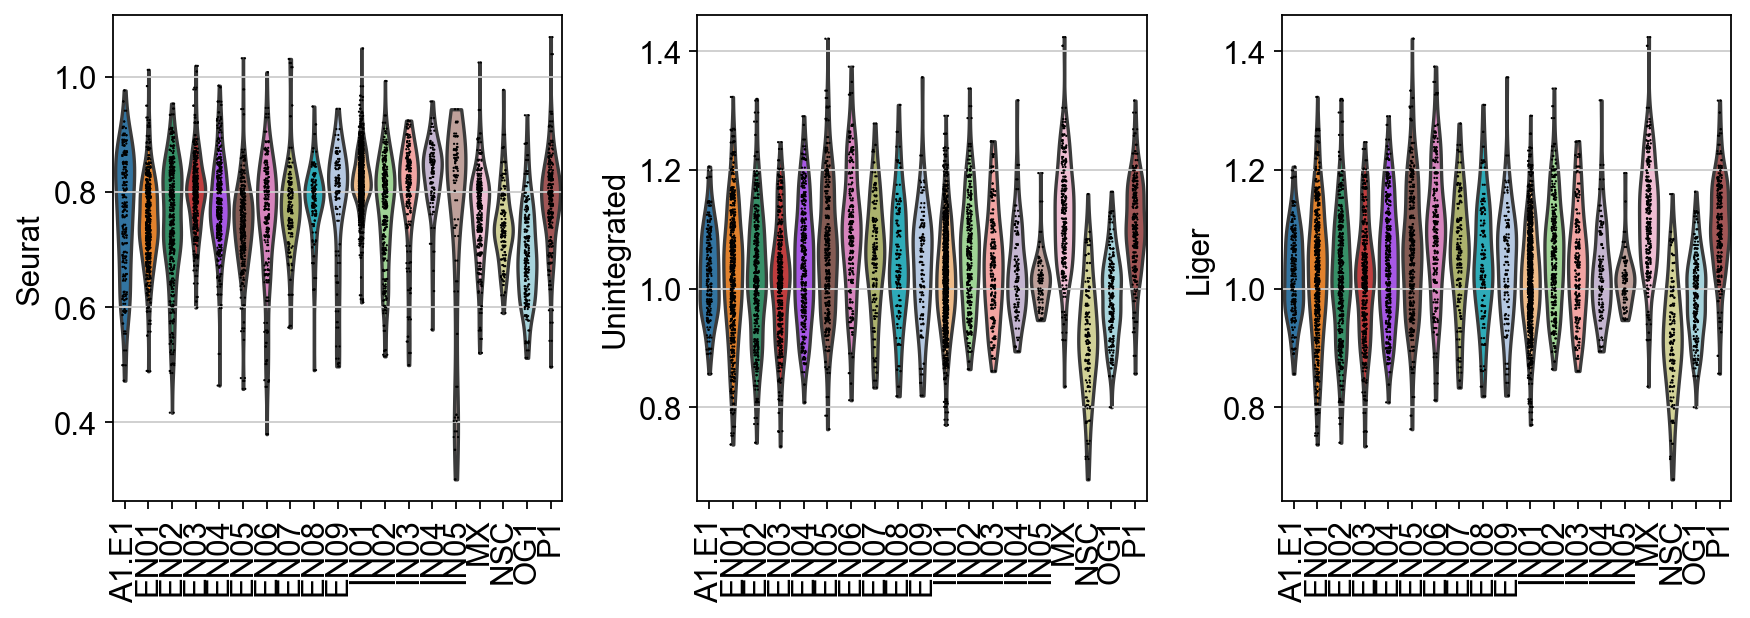

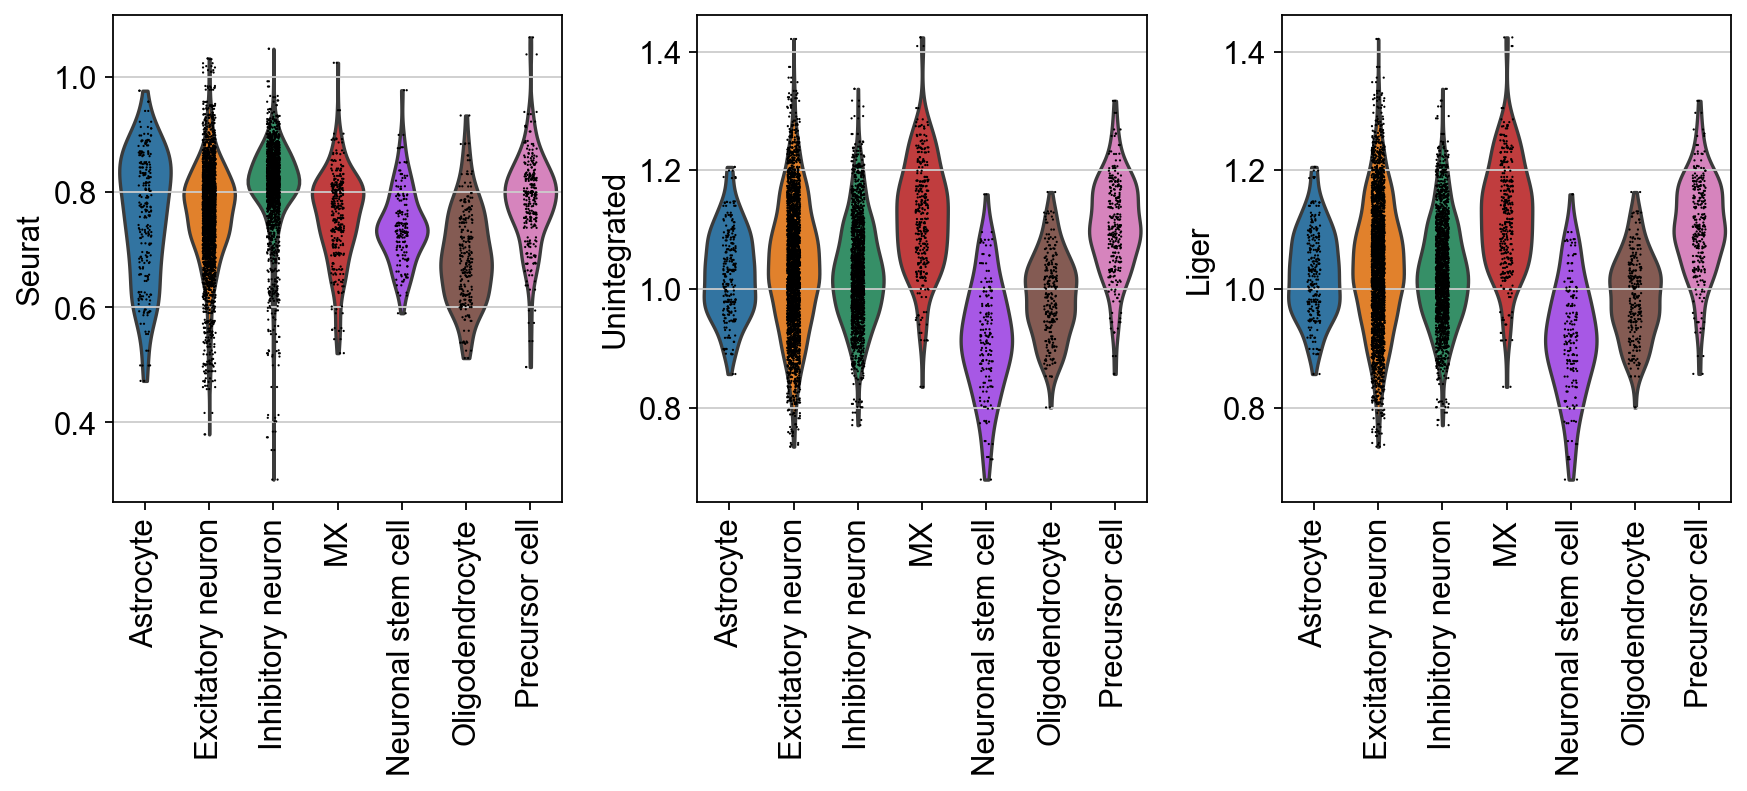

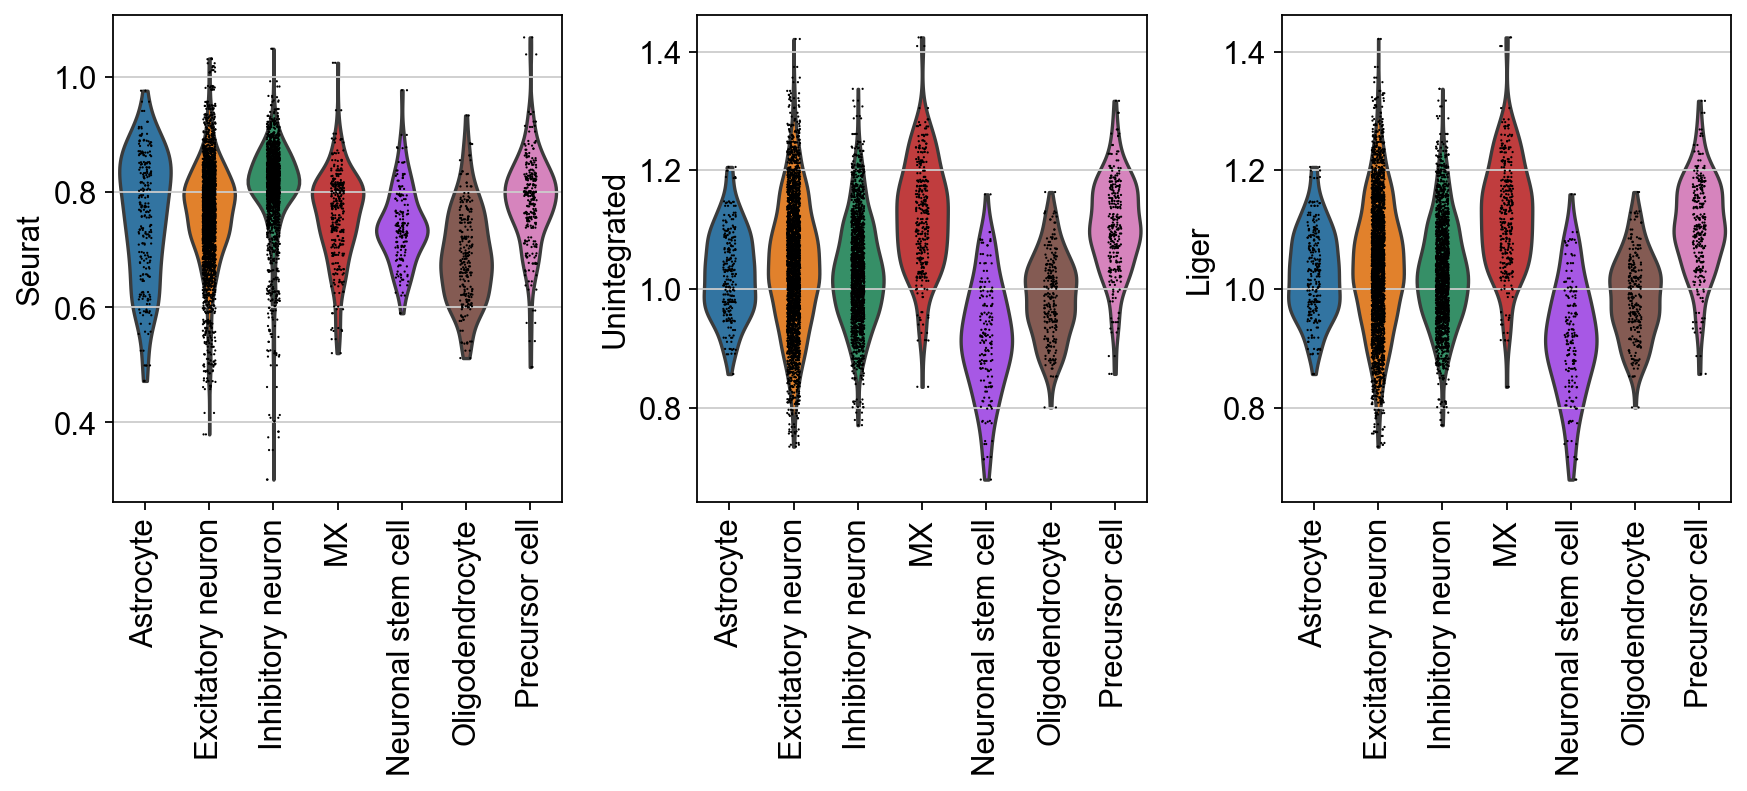

... storing 'matching_barcodes' as categorical


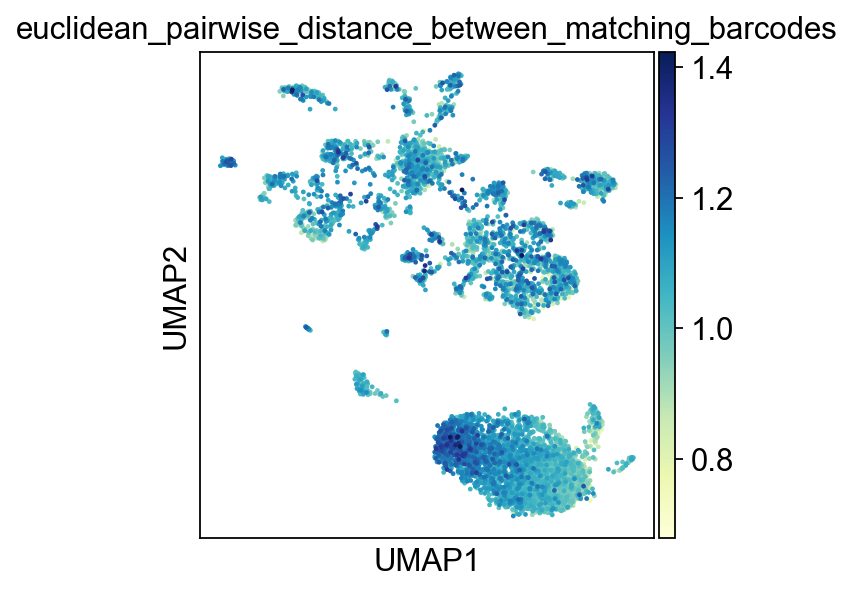

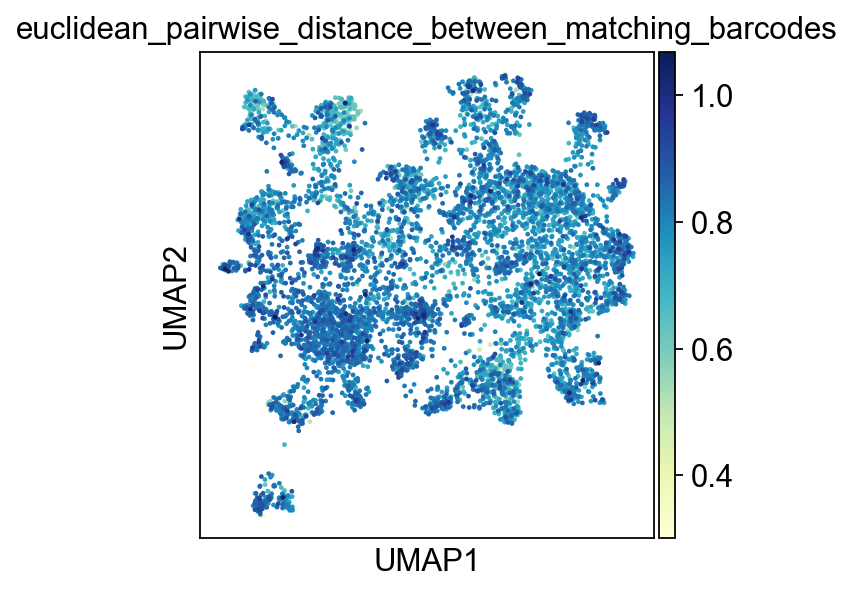

... storing 'matching_barcodes' as categorical


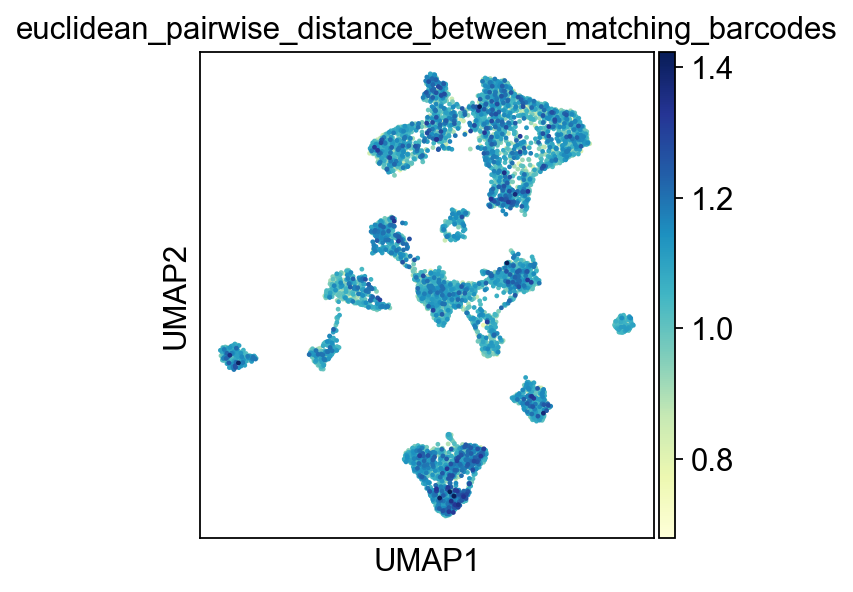

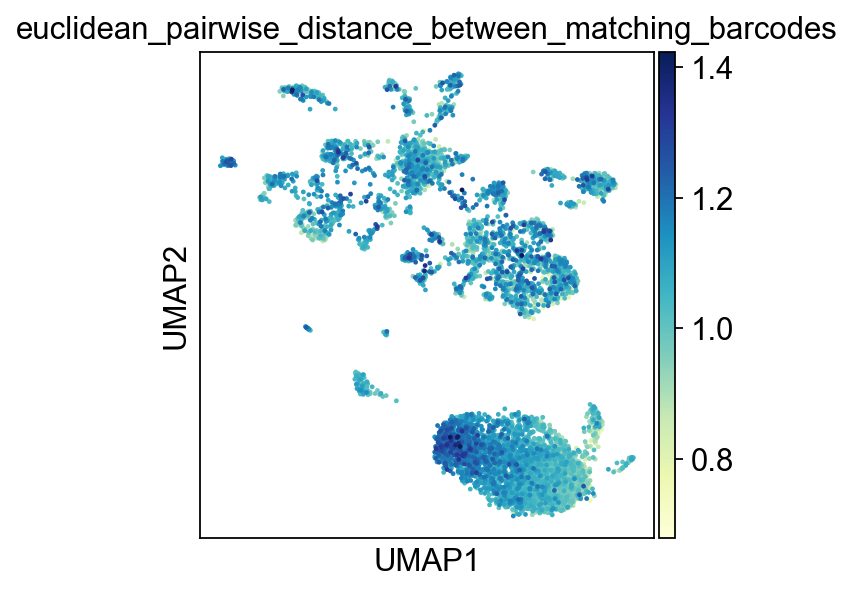

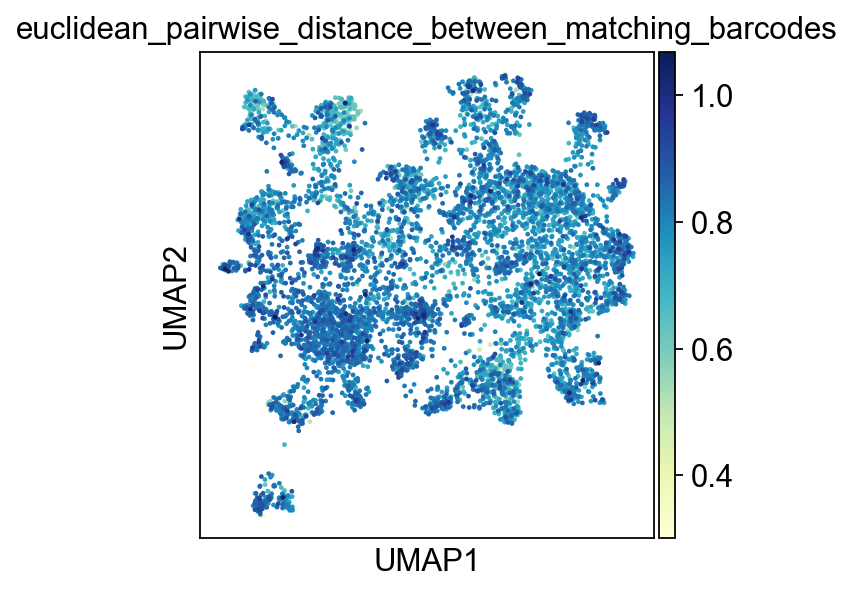

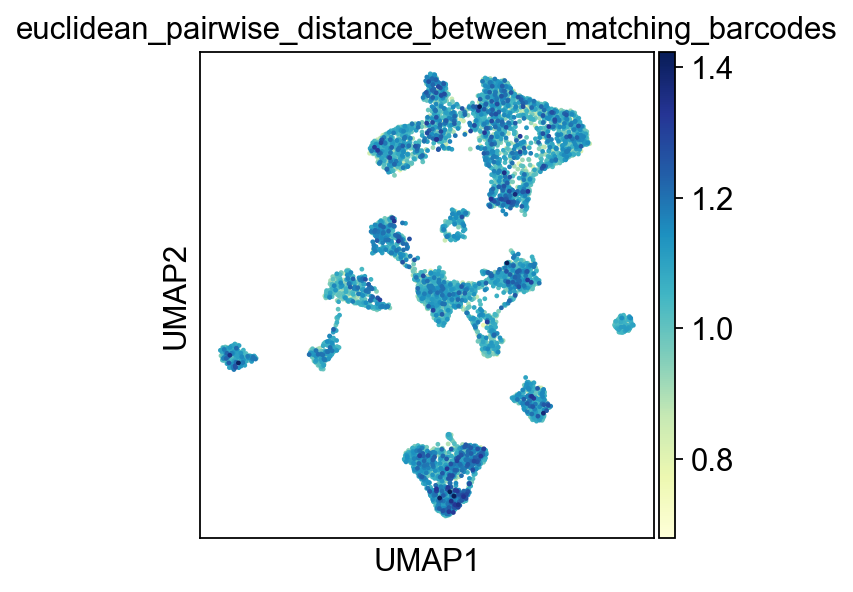

In [40]:
adataBrSeu.obs['Seurat'] = adataBrSeu.obs['euclidean_pairwise_distance_between_matching_barcodes'].tolist()
adataBrSeu.obs['Unintegrated'] = adataBrUnint.obs['euclidean_pairwise_distance_between_matching_barcodes'].tolist()
adataBrSeu.obs['Liger'] = adataBrLig.obs['euclidean_pairwise_distance_between_matching_barcodes'].tolist()

sc.pl.violin(adataBrSeu,
             keys=['Seurat', 'Unintegrated','Liger'],
            groupby="paper_cell_type",
             title='euclidean pairwise distance between matching barcodes',
             rotation=90, save='pairwise_distance_barcodes_per_paper_cell_type_brain.png')
sc.pl.violin(adataBrSeu,
             keys=['Seurat', 'Unintegrated','Liger'],
            groupby="paper_cell_type",
             title='euclidean pairwise distance between matching barcodes',
             rotation=90, save='pairwise_distance_barcodes_per_paper_cell_type_brain.pdf')

sc.pl.violin(adataBrSeu,
             keys=['Seurat', 'Unintegrated','Liger'],
            groupby="broad_cell_type_annotation",
             title='euclidean pairwise distance between matching barcodes',
             rotation=90, save='pairwise_distance_barcodes_per_broad_annotations_brain.png')
sc.pl.violin(adataBrSeu,
             keys=['Seurat', 'Unintegrated','Liger'],
            groupby="broad_cell_type_annotation",
             title='euclidean pairwise distance between matching barcodes',
             rotation=90, save='pairwise_distance_barcodes_per_broad_annotations_brain.pdf')

sc.pl.umap(adataBrUnint,
           color=['euclidean_pairwise_distance_between_matching_barcodes'],
          save='brain_unintegrated_pairwise_distance.png')
sc.pl.umap(adataBrSeu,
           color=['euclidean_pairwise_distance_between_matching_barcodes'],
          save='brain_seurat_pairwise_distance.png')
sc.pl.umap(adataBrLig,
           color=['euclidean_pairwise_distance_between_matching_barcodes'],
          save='brain_liger_pairwise_distance.png')

sc.pl.umap(adataBrUnint,
           color=['euclidean_pairwise_distance_between_matching_barcodes'],
          save='brain_unintegrated_pairwise_distance.pdf')
sc.pl.umap(adataBrSeu,
           color=['euclidean_pairwise_distance_between_matching_barcodes'],
          save='brain_seurat_pairwise_distance.pdf')
sc.pl.umap(adataBrLig,
           color=['euclidean_pairwise_distance_between_matching_barcodes'],
          save='brain_liger_pairwise_distance.pdf')

## SKIN

In [ ]:
adataSkUnint.obs['matching_barcodes'] = [x.split('_')[1] for x in adataSkUnint.obs_names.tolist()]
adataSkSeu.obs['matching_barcodes'] = [x.split('_')[0] for x in adataSkSeu.obs_names.tolist()]
adataSkLig.obs['matching_barcodes'] = [x.split('_')[1] for x in adataSkLig.obs_names.tolist()]

distance_Unintegrated_skin = average_distance_between_matching_barcodes(adataSkUnint,
                                                                        cell_names='matching_barcodes',
                                                                        cell_type=None,
                                                                 absolute=True)

distance_Liger_skin = average_distance_between_matching_barcodes(adataSkLig,
                                                                 cell_names='matching_barcodes',
                                                                 cell_type=None,
                                                                 absolute=True)

distance_Seurat_skin = average_distance_between_matching_barcodes(adataSkSeu,
                                                                  cell_names='matching_barcodes',
                                                                  cell_type=None,
                                                                 absolute=True)
df_metrics_skin['pairwise_distance_barcode_euclidean_absolute'] = [distance_Unintegrated_skin,
                                                           distance_Seurat_skin,
                                                           distance_Liger_skin]
del distance_Unintegrated_skin, distance_Seurat_skin, distance_Liger_skin

In [ ]:
adataSkUnint.obs['matching_barcodes'] = [x.split('_')[1] for x in adataSkUnint.obs_names.tolist()]
adataSkSeu.obs['matching_barcodes'] = [x.split('_')[0] for x in adataSkSeu.obs_names.tolist()]
adataSkLig.obs['matching_barcodes'] = [x.split('_')[1] for x in adataSkLig.obs_names.tolist()]

distance_Unintegrated_skin = average_distance_between_matching_barcodes(adataSkUnint,
                                                                        cell_names='matching_barcodes',
                                                                        cell_type=None,
                                                                 absolute=False)

distance_Liger_skin = average_distance_between_matching_barcodes(adataSkLig,
                                                                 cell_names='matching_barcodes',
                                                                 cell_type=None,
                                                                 absolute=False)

distance_Seurat_skin = average_distance_between_matching_barcodes(adataSkSeu,
                                                                  cell_names='matching_barcodes',
                                                                  cell_type=None,
                                                                 absolute=False)
df_metrics_skin['pairwise_distance_barcode_euclidean_relative'] = [distance_Unintegrated_skin,
                                                           distance_Seurat_skin,
                                                           distance_Liger_skin]
del distance_Unintegrated_skin, distance_Seurat_skin, distance_Liger_skin

In [ ]:
adataSkSeu.obs['Seurat'] = adataSkSeu.obs['euclidean_pairwise_distance_between_matching_barcodes'].tolist()
adataSkSeu.obs['Unintegrated'] = adataSkUnint.obs['euclidean_pairwise_distance_between_matching_barcodes'].tolist()
adataSkSeu.obs['Liger'] = adataSkLig.obs['euclidean_pairwise_distance_between_matching_barcodes'].tolist()

sc.pl.violin(adataSkSeu,
             keys=['Seurat', 'Unintegrated','Liger'],
            groupby="paper_cell_type",
             title='euclidean pairwise distance between matching barcodes',
             rotation=90, save='pairwise_distance_barcodes_per_paper_cell_type_skin.png')
sc.pl.violin(adataSkSeu,
             keys=['Seurat', 'Unintegrated','Liger'],
            groupby="paper_cell_type",
             title='euclidean pairwise distance between matching barcodes',
             rotation=90, save='pairwise_distance_barcodes_per_paper_cell_type_skin.pdf')

sc.pl.violin(adataSkSeu,
             keys=['Seurat', 'Unintegrated','Liger'],
            groupby="broad_cell_type_annotation",
             title='euclidean pairwise distance between matching barcodes',
             rotation=90, save='pairwise_distance_barcodes_per_broad_annotations_skin.png')
sc.pl.violin(adataSkSeu,
             keys=['Seurat', 'Unintegrated','Liger'],
            groupby="broad_cell_type_annotation",
             title='euclidean pairwise distance between matching barcodes',
             rotation=90, save='pairwise_distance_barcodes_per_broad_annotations_skin.pdf')

sc.pl.umap(adataSkUnint,
           color=['euclidean_pairwise_distance_between_matching_barcodes'],
          save='skin_unintegrated_pairwise_distance.png')
sc.pl.umap(adataSkSeu,
           color=['euclidean_pairwise_distance_between_matching_barcodes'],
          save='skin_seurat_pairwise_distance.png')
sc.pl.umap(adataSkLig,
           color=['euclidean_pairwise_distance_between_matching_barcodes'],
          save='skin_liger_pairwise_distance.png')

sc.pl.umap(adataSkUnint,
           color=['euclidean_pairwise_distance_between_matching_barcodes'],
          save='skin_unintegrated_pairwise_distance.pdf')
sc.pl.umap(adataSkSeu,
           color=['euclidean_pairwise_distance_between_matching_barcodes'],
          save='skin_seurat_pairwise_distance.pdf')
sc.pl.umap(adataSkLig,
           color=['euclidean_pairwise_distance_between_matching_barcodes'],
          save='skin_liger_pairwise_distance.pdf')

In [ ]:
## save latest metrics 
df_metrics_brain.to_csv("metrics_brain_mo_integration_4.csv")
df_metrics_brain =pd.read_csv("metrics_brain_mo_integration_4.csv", index_col=0)
df_metrics_brain

In [ ]:
df_metrics_skin.to_csv("metrics_skin_mo_integration_4.csv")
df_metrics_skin =pd.read_csv("metrics_skin_mo_integration_4.csv", index_col=0)
df_metrics_skin